# VESIcal: An open-source model engine for mixed volatile (H$_2$O-CO$_2$) solubility in silicate melts
## (For Earth and Space Sciences, an AGU Journal)
***
## Kayla Iacovino$^1$, Simon Matthews$^2$, Penny Wieser$^3$, Gordon M. Moore$^1$, Florence Bégué$^4$
$^1$Jacobs, NASA Johnson Space Center, Houston, TX 77058, USA
<br>$^2$Johns Hopkins University, Department of Earth and Planetary Sciences, Baltimore, MD 21218, USA
<br>$^3$University of Cambridge, Department of Earth Sciences, Downing Street, Cambridge CB2 3EQ, UK
<br>$^4$University of Lausanne, Institute of Earth Sciences, Lausanne, Switzerland

# Key Points
1. The first comprehensive volatile solubility tool capable of processing large datasets automatically
2. Eight built-in solubility models, with automatic calculation and plotting functionality
3. Build in python but easily usable by scientists with any level of coding skill

# Abstract

Thermodynamic modelling has been the backbone of interpreting geologic data and modelling geologic systems for decades. However, more recent advancements in computational capabilities and a marked increase in researchers' accessibility to computing tools has outpaced the functionality and extensibility of currently available modelling tools. Here we present the first comprehensive modelling tool for H$_2$O, CO$_2$, and mixed (H$_2$O-CO$_2$) solubility in silicate melts that: a) allows users access to all commonly used models, including easy inter-comparison between models; b) provides universal functionality for all models (e.g., functions for calculating saturation pressures, degassing paths, etc.); c) can process large datasets (1,000's of samples) automatically; d) outputs computed data into an excel spreadsheet for simple post-modelling analysis; e) integrates advanced plotting capabilities directly within the tool; and f) provides all of these within the framework of a python library, making the tool extensible by the user and allowing any of the model functions to be incorporated into any other code capable of calling python. The tool is presented within this manuscript, which is a Jupyter notebook containing worked examples accessible to python users with a range of skill levels. The VESIcal python library is open-source and available for download at [https://github.com/kaylai/VESIcal](https://github.com/kaylai/VESIcal).

# Plain Language Summary
To be written after first full draft is complete.

# 1. Introduction
<a id='introduction'></a>

The most abundant volatile components found in terrestrial magmatic systems are H$_2$O and CO$_2$. It has been known for nearly a century (Bowen, 1924; Tuttle & Bowen, 1952) that these components have profound effects on the chemical and material properties of magmas (e.g. phase equilibria, melting temperatures, magma viscosity and density), and thus significantly affect their geochemical and dynamical behavior (e.g. eruption and degassing style, role of magmatism in terrestrial C/H budgets, etc). Therefore, in order to understand, and accurately predict the behavior of magmas in both plutonic and volcanic environments, it is critical to assess how H$_2$O and CO$_2$ behave in magmatic systems as a function of intensive variables such as pressure, temperature, and melt/fluid composition.  

One specific and critically important behavior of volatiles in magmas is their solubility. Volatile solubility of a magma is defined at a given pressure and temperature as the volatile content at which a magma becomes volatile saturated; i.e., the conditions where the melt can no longer hold the volatile in solution, and there is a resulting change in the number of magmatic phases present (e.g. from melt + crystals to melt + crystals + fluid). The solubility of H$_2$O and CO$_2$ are strongly pressure-dependent, as well as depending on the composition of the silicate melt (and, to a lesser extent, its temperature). Thus, as a magma rises from depth to the surface, the solubility of CO$_2$ and/or H$_2$O will eventually drop below the concentration of these dissolved volatile species in the melt, and the magma will become volatile-saturated.
[PW-I've reworded this quite a lot to specigy H2O and CO2 here rather than just "volatiles" as sulfur solubility in the weird sulfide saturation sense actually increases with decreasing pressure]
This change from volatile under-saturated to volatile-saturated is significant in terms of both the chemical and physical evolution of a rising magma, as 1.) the formation of a volatile fluid phase comes with a large change in total volume due to bubble formation and the large molar volume of H$_2$O-CO$_2$ fluids, 2.) the bubbles themselves may increase the bulk magma viscosity (refs?) and become nucleation sites for crystals (refs?), 3.) the volatile content of the silicate melt portion of the magma is no longer constant and begins to decrease with pressure, thereby increasing the viscosity of the melt (ref’s?), and thus bulk magma viscosity, and 4.) with decreasing volatile content in the melt, mineral phase boundaries may be crossed, resulting in the stabilization (crystallization) or destabilization (reaction melting) of phenocryst phases (ref’s?). 

## 1.1 Experimental studies determining volatile solubility in magmas
Given the critical importance of volatile solubility to our understanding of magmatic systems discussed above, it is no surprise that there is a great deal of past work to quantify it, starting with the classic treatise of Tuttle & Bowen (1952?). This study led to the wider recognition of the importance of volatiles, and initiated a significant effort in the development of both the experimental and analytical approaches to determining volatile solubilities as a function of pressure, temperature, and melt composition. Hamilton et al (1964) was one of the first studies that compared H$_2$O solubilities for differing melt compositions (basalt and andesite), while also investigating the effect of dissolved H$_2$O and oxidation state on the magmatic phase equilibria. This study was followed by the groundbreaking experimental measurements of the Burnham group on the dissolution of H$_2$O in albite melts (Burnham et al, 197?; 197??; Holloway et al, 19??).  Many subsequent studies have continued since, aided significantly by developments in analytical techniques to determine dissolved volatile contents, such as infra-red spectroscopy (FTIR; e.g., Stolper, 1980; Stolper et al, 198??, Fine & Stolper, 1980; etc), and secondary ion mass spectrometry (SIMS; Hervig, Hauri, etc, need more ref’s here). The fact that both the FTIR and SIMS techniques can measure volatile contents on samples with sizes of only a few tens of microns has facilitated investigation of pre-eruptive magmatic volatile contents through measurements of undegassed pockets of magma trapped within crystals as melt inclusions (Wallace, Roggensack, Plank, etc). [PW-I'm not sure how we want to word this - at least in basaltic systems, melt inclusions are mostly used to get S, Cl, F, H2O concentrations, while CO2 almost always just tells you about pressure as so few suites are CO2 undersaturated. Perhaps worth adding a sentence about how these melt inclusions are crucial to get magma storage depths? I've added one possibility here] This explosion of new information from melt inclusion measurements about pre-eruptive volatile contents made understanding volatile solubility in magmas as a function of pressure and temperature even more critical for the interpretation of the data, and highlighted the need for flexible and precise solubility models that allowed estimation of solubility conditions for a broad range of pressure, temperature, and melt/fluid compositions. Additionally, in more mafic volcanic systems (e.g., Ocean Island Volcanoes, Mid-oceanic ridges), the relatively low solubility of CO$_2$ at crustal pressures relative to the typical concentrations in mantle melts mean that melts are almost exclusively volatile-saturated as they transend the crust. Thus, measurements of CO$_2$ and H$_2$O within melt inclusions can be used to determine the pressures at which these inclusions were trapped within their host crystals. Through the conversion of these entrapment pressures into depths (using constraints on the density profile of the crust), populations of melt inclusions can be used to determine the depths of the main magma storage regions supplying a given volcanic centre. 
## 1.2 Solubility models: their development, calibration, and theoretical underpinnings

    
Until now, quantitative calculations of volatile solubility, saturation pressures, and degassing paths has been a time-consuming endeavour. In many cases, no accompanying tool was provided alongside the publication of a new solubility model, requiring users to correctly combine and interpret the relevant equations (e.g., Dixon et al., 1995; Dixon, 1997; Liu et al., 2005; Shishkina et al., 2014). This is problematic from a perspective of reproducability of the multitude of studies utilizing these models, especially given that some of the equations in the original manuscripts contain typos. For some models, an excel spreadsheet was provided, or available at request from the authors. For example, Newman and Lowenstern (2002) included a simplified version of the Dixon (1997) model as part of “VolatileCalc”, which was written in Visual Basic for Excel. Due to its simplicity, allowing users to calculate saturation pressures, degassing paths, isobars and isopleths with a few button clicks and pop-up boxes, this tool has proved extremely popular (with 741 citations at the time of writing). However, to calculate saturation pressures using VolatileCalc, the user must individually enter the SiO$_2$, H$_2$O, CO$_2$ content and temperature of every single sample into pop-up boxes. Similarly, the excel spreadsheet for the Moore et al. (1998) model calculates dissolved H$_2$O contents based on the concentration of 9 oxides, temperature, and the fraction of X$_{H_{2}O}$ in the vapour, which must be pasted in for every sample. Finally, Allison et al. (2019) provide an excel spreadsheet that allows users to calculate fugacities, partial pressures, isobars, isopleths and saturation pressures. Again, parameters for each sample must be entered individually, with no way to calculate large numbers of samples automatically. 

More recently, authors have provided web-hosted interfaces to calculating saturation pressures and dissolved volatile contents (e.g., Iacono-Marziano et al., 2012; http://calcul-isto.cnrs-orleans.fr/, and Ghiorso and Gualda, 2015; http://melts.ofm-research.org/CORBA_CTserver/GG-H2O-CO2.html). Ghiorso and Gualda (2015) also provide a Mac Application. The main limitation of these web tools is that they require manual entry of the concentrations of 8-10 major oxides, temperature, as well as CO$_2$ and H$_2$O concentrations to calculate saturation pressures, or X$_{H2O}$ to calculate dissolved volatile contents. Unlike the Moore et al. (1998) spreadsheet, the oxide concentrations for a single sample cannot be pasted in en-mass, but must be individually typed or pasted into each box. This is particularly problematic for melt inclusion studies, where saturation pressures are calculated for hundreds of inclusions, each with different entrapment temperatures, CO$_2$, H$_2$O, and major element concentrations. For example, the saturation pressures from 105 Gakkel ridge melt inclusions calculated in Magmasat by Bennet et al. (2019) required the manual entry of 1365 values! The potential for user error in this data entry stage should not be overlooked. Another issue with these web-hosted tools is their longevity; the link provided in the Iacono-Marziano et al. (2012) manuscript returns an error “this site cannot be reached”, although email contact with the author directed us towards the newer link given above. Similarly, the web tool for the popular Papale et al. (2006) H$_2$O-CO$_2$ solubility model returns an error message, and the link to the H$_2$O-CO$_2$ equation of state web calculator that Duan and Zhang (2006) provided in their manuscript returns a 404 error. 

In contrast, VESIcal is an open source tool and as such is far less prone to the preservation issues discussed above. Because the VESIcal code is hosted on GitHub, every change to the code is tracked publicly (Perkel, 2016 ). VESIcal’s current release is also archived on Zenodo, which provides a static citable DOI (DOI here) for the current version of the code, along with a snapshot of the GitHub repository at the time of release.


# 2. Research Methodology
<a id='research_methodology'></a>

<font color='red'> [PW-I've moved some of the suggested headings from Section 1 into here, as it felt weird to describe the calibration and how VESIcal uses them before introducing VESIcal itself, but i will not be offended if you reshuffle!] </font>


Here we present a tool that incorporates the majority of the most popular volatile solubility models under one proverbial roof:

-	MagmaSat (MELTS v. 1.2.0; Ghiorso and Gualda, 2015; the default model)
-	The simplification of the Dixon (1997) model implemented in VolatileCalc (Newman and Lowenstern, 2002)
-	Moore et al. (1998; water only, but H$_2$O fluid concentration can be specified)
-	Liu et al (2005; H$_2$O-CO$_2$, rhyolitic compositions only)
-	Iacono-Marziano et al. (2012)
-	Shishkina et al. (2014)
-	Allison et al. (2019, carbon only).

VESIcal (Volatile Equilibria and Saturation Identification calculator) is a thermodynamic volatile solubility model engine capable of performing a wide array of calculations using any one of seven published solutiliby models. As any individual model is only valid within its calibrated range (see below), and each model is parameterized and expressed differently (e.g., empirical vs. thermodynamical models), it is impractical to simply combine them into one large model. Instead, VESIcal is a single tool that can access and utilize all of these models, with an extensive pressure-temperature-composition calibration range (Figure calibrange). VESIcal represents the first volatile solubility tool with the ability to perform calculations for multiple samples at once, with built-in functionality for extracting data from an Excel file.  In addition, the code is written such that it is flexible (sample, calculation type, and model type can be chosen discretely) and extensible (VESIcal code can be easily imported for use in python scripts, and the code is formatted such that new volatile models can be easily added). 



VESIcal has been designed for practicality and ease of use. It is designed to be used by anyone, from someone who is completely unfamiliar with coding to an adept programmer. The non-coder user can interact with VESIcal through this manuscript, which utilizes the user-friendly Jupyter Notebook format, allowing them to upload a file with data, execute the various example calculations provided below, and save the results to an Excel file to work with outside of VESIcal. More experienced programers may wish to use the more advanced functionality provided by VESIcal, including the ability to hybridize models (e.g., use one model for H$_2$O and another for CO$_2$) or write their own routines and code calling VESIcal methods. All of the calculations implemented in VESIcal can be performed using any of the models included. The code is structured by calculation rather than by model, which provides an intuitive way for users to interact with the code and compare outputs from multiple models. A python class is definied for each calculation. These classes can be called as python methods, take the model name and any applicable data as arguments, and return the results of the calculation. Each class performs five key functions: 1) creates the requested model object and performs any necessary pre-processing (e.g., ensuring relevant data are present; normalizing data); 2) takes user input and performs the mathematical calculation; 3) does any necessary processing of the output (e.g., normalizing totals); 4) checks that the model is being used within its calibrated range; and 5) returns calcualted outputs in an intuitive and manipulatable format (e.g., a python dictionary, a figure, or a pandas DataFrame). Results of calculations can easily be saved to one or more Excel files (.xslx).


This tool has enormous potential to increase our understanding of igneous systems. As discussed above, calculating saturation pressures for melt inclusions using existing tools is an incredibly time-consuming pursuit, requiring hundreds to thousands of individual numbers to be manually entered. As a result, very few studies have compared the sensitivity of their pressure estimates to the choice of solubility model, or propagated errors inherent to measurements of volatile concentrations in melts using SIMS, FTIR and Raman Spectroscopy into an error bar in terms of saturation pressure. In contrast, VESIcal allows users to import an excel spreadsheet with each row containing the major element and volatile contents of each inclusion, as well as a temperature at which to evaluate solubility. Using the batch calculation functions, VESIcal will automatically calculate the saturation pressure for each row, using a user-specified model. Thus, users can easily compare results from different solubility models, to robustly assess their applicablility for the system of interest. Additionally, users could easily load a different spreadsheet, where the CO$_2$ and H$_2$O concentrations are adjusted to reflect the analytical uncertainty on the instrment used, allowing error bars on the saturation pressure to be calculated for every single inclusion. The open-source nature of VESIcal also allows the vast capabilities of Python3 to be applied to modelling of solublity in magmas. For example, users could utilize Markov chain Monte Carlo (MCMC) methods to robustly calculate error distributions for each sample. 



## 2.1 Code Validation
A series of tests have been performed to ensure that the seven models included in VESIal are implemented correctly.  For example, saturation pressures from VESIcal for a variety of major element compositions have been compared to those determined by VolatileCalc, and the web-app provided by Iacono-Marziano et al. (2012). Additionally, published saturation pressures calculated using the Magmasat Macc App for a series of melt inclusion compositions from Bennett et al. (2019) were compared to those recalculated in VESIcal. For models without an existing tool, saturation pressures from VESIcal were compared to the experimental pressures of the calibration dataset. Similarly, dissolved volatile concentrations calculated in VESIcal were compared to existing tools for the Moore et al. (1998) and Iacono-Marziano et al. (2012) models. Finally, isobars calculated in VESIcal were compared to existing tools for VolatileCalc, and published figures for Magmasat, and Iacono-Marziano et al. (2012). 
<font color='red'> [P.W. Still issues with Shishkina isobars, if we can't fix, perhaps worth mentioning things we aren't happy with. Also, do we want a supplement with all the comparison figures as well as the scripts, or just the scripts and maybe a summary table of the different tests]?</font>

    
## 2.1 Model Descriptions 
Below, we detail the seven solubility models implemented in VESIcal, including information about their calibration range in terms of melt composition, pressure, and temperature (summarized in Table X). In particular, we emphasize statements of caution from the authors of these models regarding their extrapolation outside these calibration limits. Where applicable, these warnings have been included in VESIcal, so that any calculation using a model outside the stated calibration range returns an warning message along with the requested output. We also provide several Jupyter notebooks in the supplementary material, allowing users to plot their data amongst the calibrations of the different models to assess their suitability for less objective measures. 

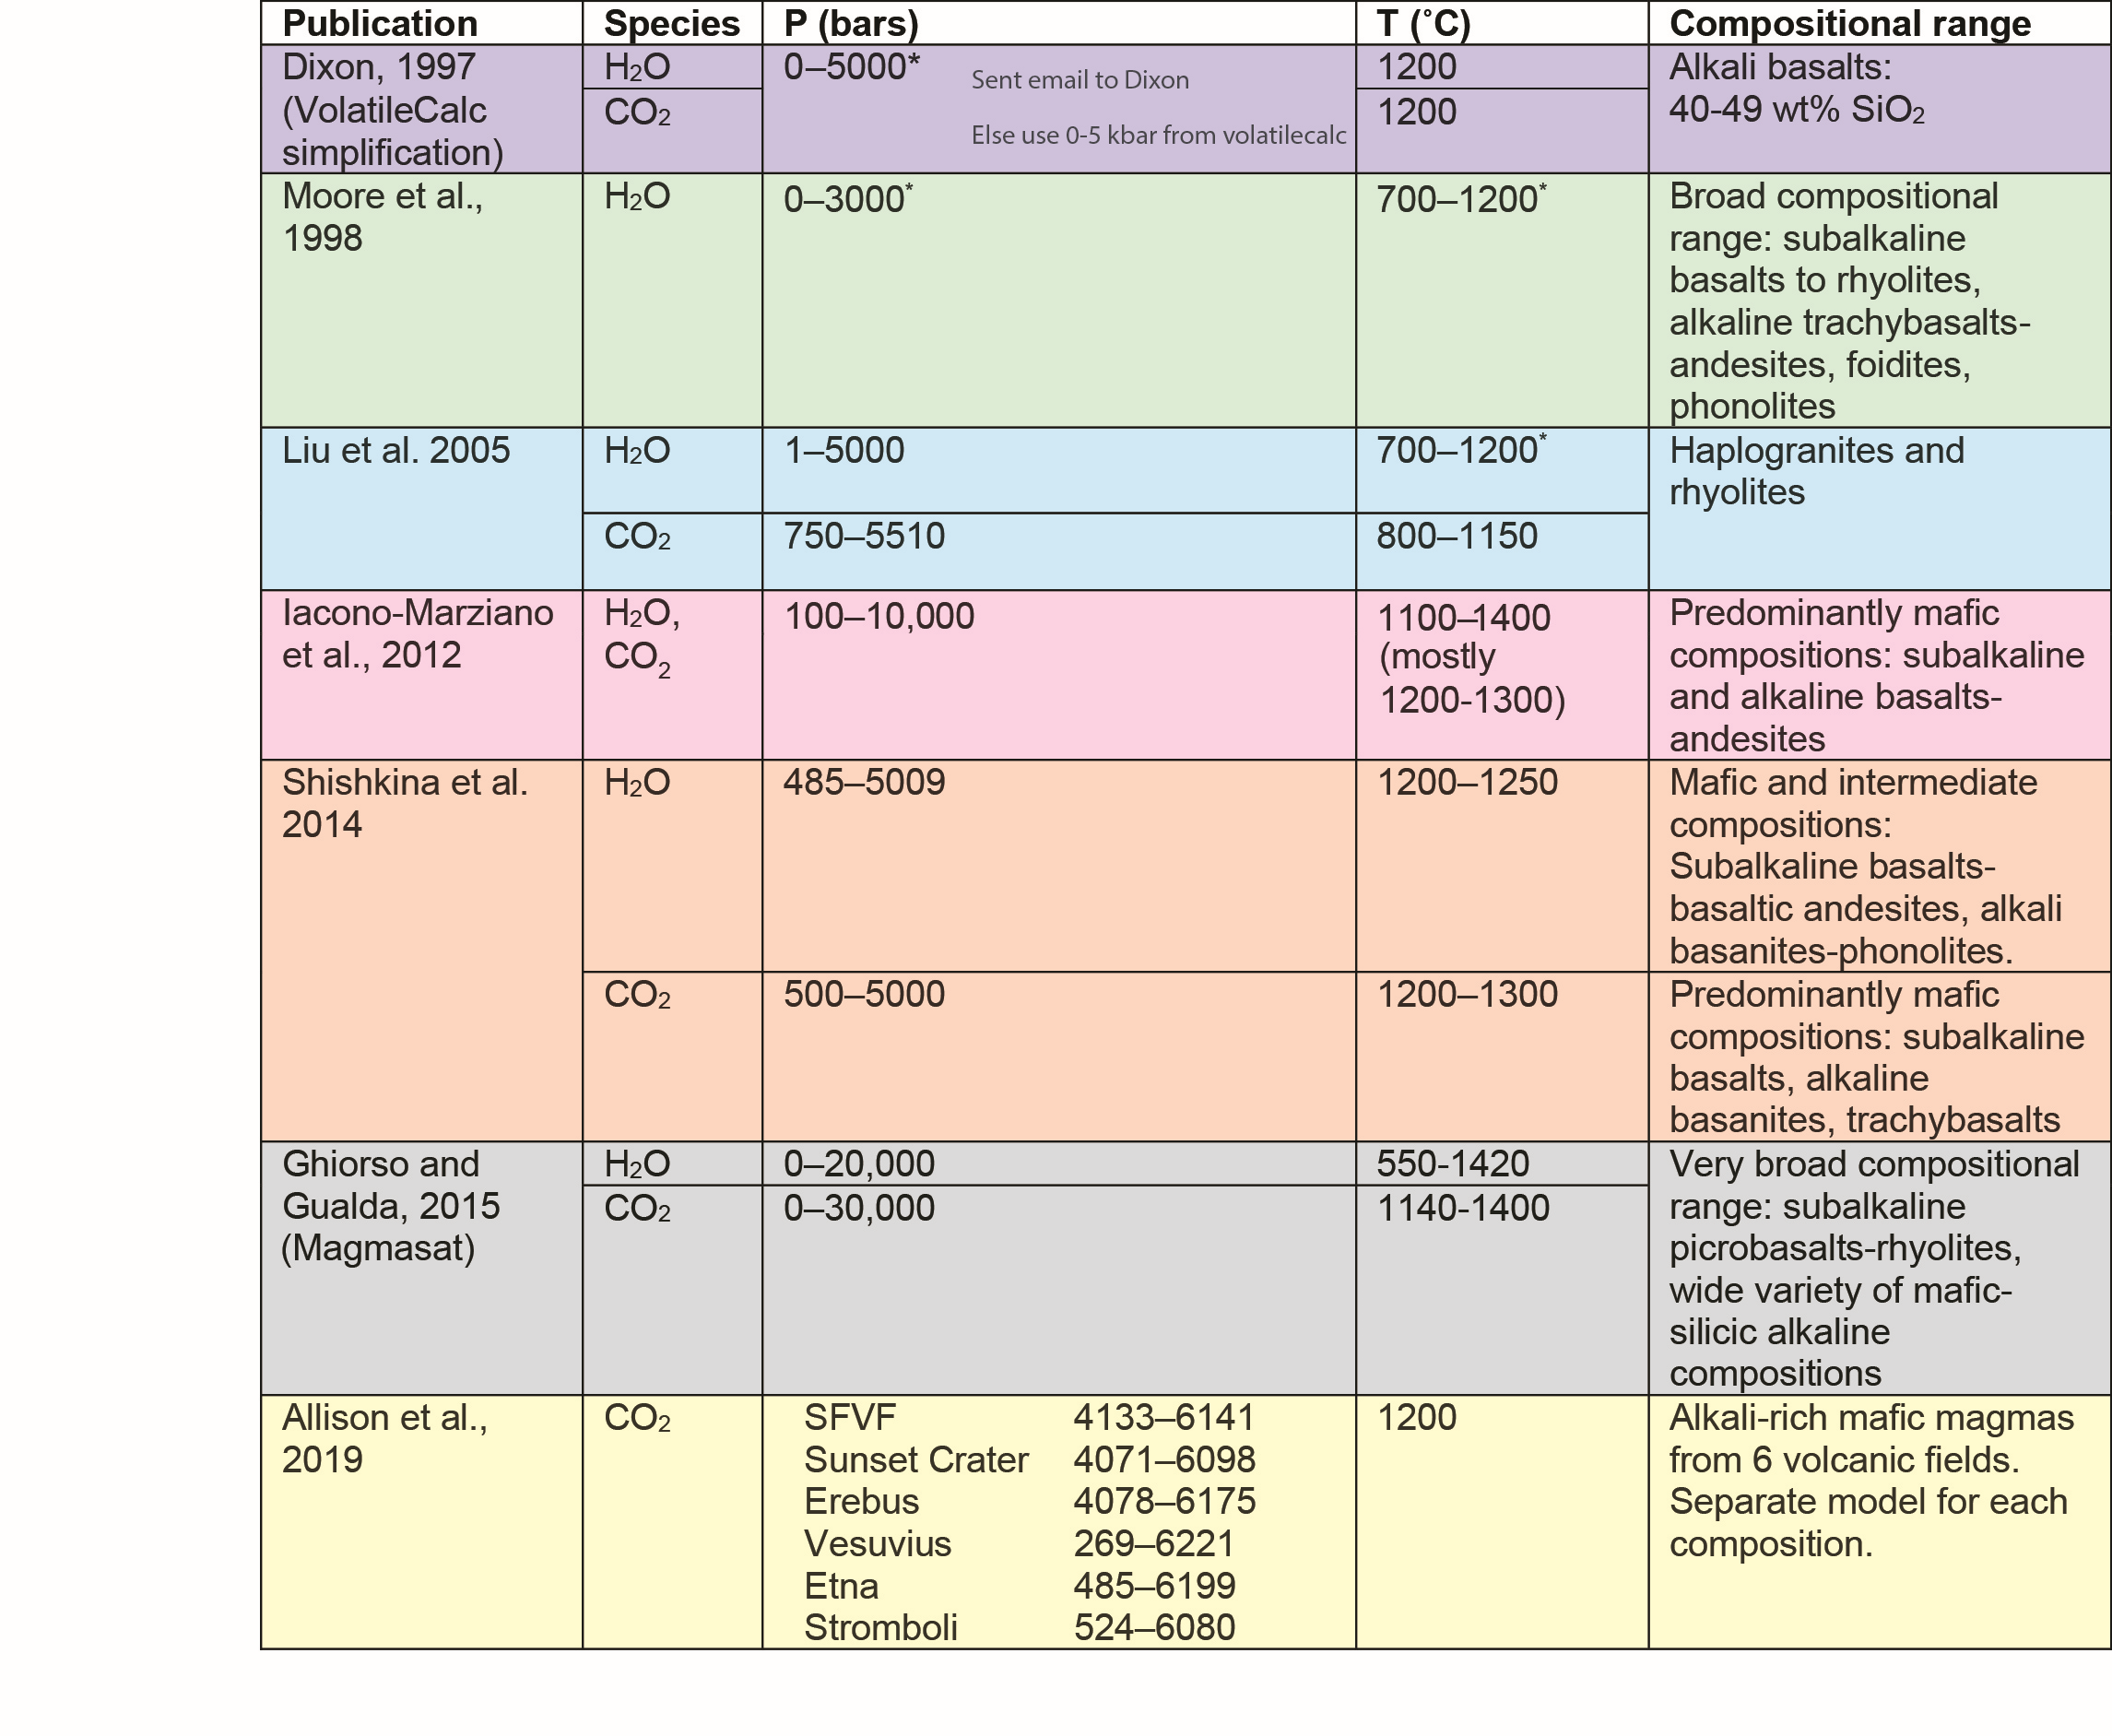
Table 1 - Table showing the range of pressures and temperatures in the calibration dataset for each model. Numbers marked with a * show the range suggested by the author, which differ slightly from the calibration dataset. For example, the dataset for Moore et al., 1998 contains two samples with pressures of ~6000 bars, but the authors warn against extrapolation beyond 3000 bars. Similarly, the 0-5000 bars range shown for the simplification of Dixon (1997) is taken from the suggestion of Newman and Lowenstern (2002). The approximate compositional range of each model is also described in terms of common classifications on a TAS diagram, as well as some of the classifications used by the various authors. 



<font color='red'> - I've put each model in separate boxes for now to help typing and running the equations </font>
### 1. The VolatileCalc simplification of Dixon (1997)
The Dixon (1997) model calculates the solubility of H$_2$O and CO$_2$ solubility for basaltic silicate melts, combining thermodynamic expressions as a function of pressure and temperature from Dixon and Stolper (1995), and an empirical compositional parameter, $\Pi$, expressed in terms of 7 major oxide fractions (Dixon, 1997). Based on the strong correlation between  $\Pi$ and SiO$_2$ in a suite of lavas from the North Arch Volcanic Field, Dixon (1997) simplify this compositional parameter by expressing the X$_{CO_{3}^{2-}}^{m}$ (P$_{0}$, T$_{0}$) and X$_{H_{2}O_{mol}}^{m}$ (P$_{0}$, T$_{0}$) terms in the thermodynamic expression from Dixon et al. (1995) as a function of melt SiO$_2$ content:

\begin{equation}
X_{CO_{3}^{2-}}^{m} (P_{0}, T_{0}) = 8.697 \times 10^{-6} - 1.697 \times 10^{-7}
\end{equation}

\begin{equation}
X_{H_{2}O_{mol}}^{m} (P_{0}, T_{0}) = 3.04 \times 10^{-5} + 1.29 \times 10^{-6}
\end{equation}

Where X$_{CO_{3}^{2-}}^{m}$ (P$_{0}$, T$_{0}$) and X$_{H_{2}O_{mol}}^{m}$ (P$_{0}$, T$_{0}$) are the mole fractions of carbonate and molecular H$_2$O in equilibrium with vapour with a fugacity of carbon dioxide or water specified by their f$_{i}$(P$_{0}$, T$_{0}$) term at 1473.15 K and 1 bar. 
 [PW as the m means melt in these, is it worth changing m to melt for consistency with the moore equations?]

These simplifications, originally designed to aid investigations of volatile solubility in the suite of North Arch lavas investigated by Dixon et al. (1997), were implemented in the popular excel-based tool VolatileCalc (Newman and Lowenstern, 2002), requiring users to specify melt temperature, SiO$_2$, CO$_2$ and H$_2$O contents to calculate saturation pressures. This simplification is also implemented in VESIcal for consistency, allowing comparisons to be drawn with the large body of existing literature using VolatileCalc (e.g., Sides et al., 2014a,b; Tuohy et al., 2016; Rasmussen et al., 2020; add more non-hawaii refs).

However, care must be taken with this simplified model. Firstly, the North Arch lavas span SiO$_2$ contents of 40-49 wt%; due to the rapid drop in $\Pi$ with increasing SiO$_2$, extrapolation beyond 51.2 wt% SiO2 yields a negative value for X$_{CO_{3}^{2-}}^{m}$ (P$_{0}$, T$_{0}$). To avoid this issue, VolatileCalc returns an error, and will not perform the calculation if users enter a SiO$_2$ content>49 wt%, or <40 wt%. Some studies extrapolate beyond this by simply entering SiO2=49 wt% into VolatileCalc if their melts have slightly higher silica contents  (e.g., Sides et al. 2014a, b; Tucker et al. 2019). If a user enters a composition with SiO2>49 wt% or <40 wt%, VESIcal performs the calculation for an SiO2 content of 49 wt% or 40 wt% respectively, and returns a warning that the model has been used outside the recommended calibration range. Newman and Lowenstern (2002) suggest that this approach will be “generally applicable for other basaltic rocks with <52 wt% SiO$_2$”. However, if a large proportion of a sample suite has SiO$_2$ contents outside this range, this simplified parameterization will neglect variations in solubility that may exist within that suite. Additionally, even if samples have SiO$_2$ contents between 40-49 wt%, this simplification is only valid for melts which follow similar trends in $\Pi$-SiO$_2$ space to the North Arch lavas. We encourage users to check this relationship using the Jupyter notebook named X provided in the supplement. If samples follow an offset trend to that defined by the North Arch lavas, or a display a different gradient, we recommend users apply one of the more recent models, which include more complete compositional terms calibrated on a wider range of basaltic compositions (e.g., Iacono-Marziano et al., 2012; Shishkina et al., 2014; Ghiorso and Gualda, 2015).  

### 2. Moore et al. (1998)

The Moore et al. (1998) model calculates the solubility of H$_2$O for a wide range of silicate melt compositions using an empirical expression valid between 700-1200˚C and 0-3000 bars:

\begin{equation}
2lnX_{H_{2}O}^{melt} = \frac{a}{T} + \sum_{i}b_{i}X_{i}\frac{P}{T} + clnf_{H_{2}O}^{fluid} + d
\end{equation}
Where $X_{H_{2}O}^{melt}$ is the mole fraction of H$_2$O dissolved in the melt, $f_{H_{2}O}^{fluid}$ is the fugacity of H$_2$O in the fluid, T is the temperature in Kelvin, P is the pressure in bars, and $X_{i}$ is the anhydrous molar fraction of each oxide component, associated with the following fit parameters:



| Coefficient | a | b$_{Al_{2}O_{3}}$ | b$_{FeO_{T}}$ | b$_{Na_{2}O}$ | c | d |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| <b> Value ($\pm$1$\sigma$) </b> | 2565 ($\pm$ 362) | -1.997 ($\pm$0.706) | -0.9275 ($\pm$0.394) | 2.736 ($\pm$0.871) | 1.171 ($\pm$0.069) | -14.21 ($\pm$0.54) |


The model calibration dataset combines the authors experiments with literature data, and spans sub-alkaline basaltic to rhyolitic compositions, also incorporating some more alkaline compositions (Fig. X TAS).

As this equation includes a term for the fugacity of H$_2$O in the fluid, this model can be integrated with the CO$_2$-only models implemented in VESIcal (e.g., the $\Pi$ - SiO$_2$ simplification of Dixon, 1997, Liu et al., 2005, Iacono-Marziano et al., 2012, Shishkina et al., 2014, Allison et al., 2019) to investigate mixed CO$_2$-H$_2$O fluids. As with all fully-empirical models implemented in VESIcal, or those including emperical expressions, extreme care must be taken when extrapolating this model outside of the calibration range. In particular, the authors warn against extrapolating this model to higher pressures, in part due to the complexities of the critical behavoir of fluids at these conditions (ref uptick P figure)


### 3. Liu et al. (2005)
The Liu et al. (2005) model calculates the solubility of H$_2$O and CO$_2$ in metaluminous, high-silica rhyolitic melts using empirical expressions, valid between 700-1200˚C, and 0-5000 bars:

\begin{equation}
CO_{2} (ppm) = \frac{b_{1}P_{CO_{2}}}{T}  + P_{CO_{2}}(b_{2}P^{0.5}_{w} + b_{3}P^{1.5}_{w}) + \frac{b_{4}P_{CO_{2}}P_{w}}{T}  
\end{equation}

With:

\begin{equation}
P_{CO_{2}}=X_{CO_{2}}^{f}P
\end{equation}

Where pressure (P) is in MPa, temperature (T) is in Kevlin, and X$_{CO_{2}}^{f}$ is the mole fraction of CO$_2$ in the fluid. The fit parameters are shown below:

| Coefficient | b$_1$ | b$_2$ | b$_3$| b$_4$ |
| :---: | :---: | :---: | :---: | :---: | 
| <b> Value (Error) </b> | 5668 ($\pm$ 127) | 0.4133 ($\pm$0.0491) | 2.041 $\times$ 10$^{-3}$ ($\pm$0.285 $\times$ 10$^{-3}$) | -55.99 ($\pm$8.36) |  

Similary, for H$_2$O:

\begin{equation}
H_{2}O_{t} (wt\%) = \frac{ a_{1}P_{w}^{0.5} + a_{2}P_{w} + a_{3}P^{1.5}_{w} }{T} + a_{4}P_{w}^{1.5} + P_{CO_{2}}(a_{5}P_{w}^{0.5} + a_{6}P_{w})
\end{equation}

With:

\begin{equation}
P_{w}=X_{w}^{f}P
\end{equation}
Where pressure (P) is in MPa, temperature (T) is in Kevlin, and X$_{H_{2}O}^{f}$ is the mole fraction of H$_2$O in the fluid. The fit parameters are shown below:


| Coefficient | a$_1$ | a$_2$ | a$_3$| a$_4$ | a$_5$ | a$_6$ |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| <b> Value (Error) </b> | 354.94 ($\pm$ 4.55) | 9.623 ($\pm$0.923) | -1.5223 ($\pm$0.0722) | 0.0012439 ($\pm$0.0000499) |  -1.084 $\times$ 10$^{-4}$ ($\pm$ 0.406 $\times$ 10$^{-4}$) | -1.362 $\times$ 10$^{-5}$  ($\pm$0.352 $\times$ 10$^{-5}$) |

The model calibration dataset combines H$_2$O solubility experiments by the authors between ~1 and 250 bars with literature experiments investigating the solubility of H$_2$O and CO$_2$, spanning significantly higher pressures (up to 5000 bars).  Unlike the Moore et al. (1998) model, their empirical expressions do not have a term dependent upon the composition of the silicate melt, so extreme care should be taken when applying this model to melts with compositions different to those in the calibration dataset.




### 4. Iacono-Marziano et al. (2012)
The Iacono-Marziano et al. (2012) model expresses the solubility of H$_2$O and CO$_2$ in mafic melts by combining simplified thermodynamic expressions with empirical formulations accounting for melt composition:
\begin{equation}
Ln[CO_{2}]^{ppm} = (x_{H_{2}O} \times d_{H_{2}O}  + x_{AI} \times d_{AI} + x_{FeO+MgO}\times d_{FeO+MgO} + x_{Na_{2}O+K_{2}O}\times d_{Na_{2}O+K_{2}O}) \\ + a_{CO_{2}} \times Ln[P_{CO_{2}}] + b_{CO_{2}} \times \Bigg[ \frac{NBO}{O} \Bigg] + B_{CO_{2}} + C_{CO_{2}} \times \frac{P}{T}
\end{equation}



Where P is the pressure in bars, T is the temperature in Kelvin, $P_{CO_{2}}$ is the partial pressure of CO$_{2}$ in bars,  x$_{H_{2}O}$ is the molar fraction of H$_{2}$O in the melt, x$_{FeO+MgO}$ is the sum of molar fractions of FeO and MgO, and x$_{Na_{2}O+K_{2}O}$ is the sum of the molar fractions of Na$_{2}$O and K$_{2}$O, and x$_{AI}$ is the agpaitic index, expressed as:

 \begin{equation}
 AI=\frac{x_{Al_{2}O_{3}}}{x_{Al_{2}O_{3}}+x_{K_{2}O}+x_{Na_{2}O}}
 \end{equation}
 
NBO/O is the number of non-bridging oxygens divided by oxygen, expressing the availability of oxygen to form carbonate groups within the melt. NBO/O can be calculated from the mol fraction of different oxides, X, on an anhydrous or hydrous basis:
  
\begin{equation}
\frac{NBO}{O} (Anhydrous)= \frac{2 \times (X_{K_{2}O} + X_{Na_{2}O} + X_{CaO} + X_{MgO} + X_{FeO}-X_{Al_{2}O_{3}}) }{ 2 \times X_{SiO_{2}} +  2 \times X_{TiO_{2}} + 3 \times X_{Al_{2}O_{3}} + X_{MgO} + X_{FeO} + X_{CaO} + X_{Na_{2}O} +X_{K_{2}O}  }
\end{equation}  
 
\begin{equation}
\frac{NBO}{O} (Hydrous)= \frac{2 \times (X_{H_{2}O} + X_{K_{2}O} + X_{Na_{2}O} + X_{CaO} + X_{MgO} + X_{FeO}-X_{Al_{2}O_{3}}) }{ 2 \times X_{SiO_{2}} +  2 \times X_{TiO_{2}} + 3 \times X_{Al_{2}O_{3}} + X_{MgO} + X_{FeO} + X_{CaO} + X_{Na_{2}O} +X_{K_{2}O} +X_{H_{2}O} }
\end{equation}
 
Coefficients are provided for both scenarios: 
 
| Coefficient | d$_{H_{2}O}$ | d$_{AI}$ | d$_{FeO+MgO}$| d$_{Na_{2}O+K_{2}O}$ | a$_{CO_{2}}$|b$_{CO_{2}}$|C$_{CO_{2}}$| B$_{CO_{2}}$|
| :---: | :----: | :-----: | :-----: | :-----: | :---: |:---: |:---: |:---: |
| <b> Hydrous ($\pm$error) </b> | -16.4 ($\pm$ 1.2) | 4.4 ($\pm$0.4) | -17.1 ($\pm$ 0.9)  | 22.8 ($\pm$ 1.1)  | 1 ($\pm$ 0.03)  | 17.3 ($\pm$ 0.9)  | 0.12 ($\pm$0.02)  |-6 ($\pm$0.4)|
| <b> Anhydrous ($\pm$error) </b> | 2.3 ($\pm$ 0.5) | 3.8 ($\pm$0.4) | -16.3 ($\pm$ 0.9)  | 20.1 ($\pm$ 1.1)  | 1 ($\pm$ 0.03)  | 15.8 ($\pm$ 0.9)  | 0.14 ($\pm$0.02)  | -5.3 ($\pm$0.4)|


For H$_2$O, the authors state that it is statistically unjustified to include d$_{i}$ terms similar to those in the CO$_{2}$ expression, due to the relatively small effect of melt composition on H$_{2}$O solubility. The effect of melt composition is only incoperated through the NBO/O term:
[PW- their paper confuses me, they say "We therefore adopted the simplest formulation possible by ignoring any chemical
control on water solubility" - but they have an NBO/O term, which is calculated from melt chemistry. Hence i've added my sentence above about this but delete if i'm wrong!]

\begin{equation}
Ln[H_{2}O]^{wt\%} = a_{H_{2}O} \times Ln[P_{H_{2}O}] + b_{H_{2}O} \times \Bigg[ \frac{NBO}{O} \Bigg]  + B_{H_{2}O} + C_{H_{2}O} \times \frac{P}{T}
\end{equation}

Where P$_{H_{2}O}$ is the partial pressure of H$_{2}$ in bars, and coefficients are shown below:

| Coefficient | a$_{H_{2}O}$ | b$_{H_{2}O}$ |  B$_{H_{2}O}$ |  C$_{H_{2}O}$ |
| :-------: | :----: | :-----: | :-----: | :-----: | 
| <b> Hydrous ($\pm$error) </b> | 0.53 ($\pm$ 0.02) |  2.35 ($\pm$ 0.28) | -3.37 ($\pm$ 0.13) | -0.02 ($\pm$ 0.02) | 
| <b> Anydrous ($\pm$error) </b> | 0.54 ($\pm$ 0.02) |  1.24 ($\pm$ 0.28) | -2.95 ($\pm$ 0.17) | 0.02 ($\pm$ 0.02) |
| <b> Web App </b> | 0.52096846  |  2.11575907 | - 3.24443335 | 0.02238884 |

The authors show that the differences between calculations performed with NBO/O calculated on a hydrous and anhydrous basis are relatively small, but that a better fit to experimental data is obtained using the hydrous basis (particularly for H$_2$O-rich, and CO$_2$-poor melts). At the time of writing, the web app provided by the authors uses hydrous coefficients for the CO$_2$ model. For the H$_2$O model, the coefficients are slightly different to those published in the final version of the manuscript. All three sets of coefficients are included in VESIcal for maximum flexibility, with the default setting using the hydrous coefficients. If users which to use a different set, they can specify:

`hydrous_coeffs = True/False (default is True)
webapp_coeffs = True/False (default is False)
e.g. excelfilename.calculate_saturation_pressure(..., hydrous_coeffs = True, webapp_coeffs = True)`

The calibration dataset for CO$_2$ combines the authors experiments with those from a variety of literature studies for mixed H$_2$O-CO$_2$ fluids, spanning temperatures between 1100 and 1400˚C, and pressures between 100 and 10,000 bars. The expression for H$_2$O incorporates pure H$_2$O experiments from the literature (spanning 163-6067 bars, and 1000-1250˚C), as well as the experiments on H$_2$O-CO$_2$ fluids used to calibrate the CO$_2$ expression. Melt compositions are predominantly mafic (SiO$_2$ < 45-57 wt% for mixed H$_2$O-CO$_2$ experiments, and 46-63 wt% for pure H$_2$O), spanning subalkaline-alkaline basalts to basaltic andesites (Fig. TAS).

Due to the empirical nature of the fitting terms incorperating melt composition, care needs to be taken when applying this model to melts with compositions, or pressures and temperatures lying outside the range of the calibration dataset. While the calibration dataset for H$_2$O is more chemically diverse than for CO$_2$, the fact that composition is only incorperated through the NBO/O parameter means that extreme caution is required when applying this model outside this range of melt compositions. The authors specifically warn that the effects of melt MgO and FeO content on CO$_2$ solubility are poorly constrained, due to the restricted variations of these parameters in their database. Additionally, while their compositional term gives equal weight to Na$_2$O and K$_2$O, the calibration dataset only includes K$_2$O-rich melts with a range of pressures, so the effect of substituting Na and K is poorly constrained. Finally, the authors warn that their regressions were performed assuming all Fe was Fe$^{2+}$, so the dependence of oxidation state on CO$_2$ solubility identified by Papale et al. (2006) is not incorporated in this model (see also Brooker et al., 2001b). Infact, of all the models incorperated within VESIcal, only Shishkina et al. (2014) and Magmasat (Ghiorso and Gualda, 2015) incorperate the effect of oxidation state [PW check this is true].

<font color='red'>  [PW:Think footnotes in jupyter need an extension, which not all readers will have? have added down bottom for now] FN1-We note that in equation 12 of the Iacono-Marziano et al. (2012) manuscript the LHS is written as $Ln[CO_{3}^{2-}]^{ppm}$.
 Also not sure if we want to make all the equations consistent between models, e.g., use [] for concentrations as here, and lower case vs. upper case Ln, always x_{a} for a cation fraction etc etc. . </font>



### 5. Shishkina et al. (2014)
The Shishkina et al. (2014) model calculates the solubility of H$_2$O and CO$_2$ using empirical expressions. Their expression for CO$_2$ solubility was calibrated on a dataset of experiments on predominantly mafic compositions between 1200-1300˚C, and 500-5000 bars:

\begin{equation}
ln[CO_{2}]^{ppm} = 1.15 \times ln(P) + 6.71 \times \Pi^{*} - 1.345
\end{equation}

Where P is the pressure in Mpa, and $\Pi^{*}$ is a compositional parameter expressed in terms of the cation fractions of 7 species:

\begin{equation}
\Pi^{*} = \frac{x_{Ca^{2+}} + 0.8x_{K^{+}} 0.7x_{Na^{+}} + 0.4x_{Mg^{2+}} + 0.4x_{Fe^{2+}}  }{x_{Si^{4+}} + x_{Al^{3+}}  }
\end{equation}

The expression for H$_2$O solubility was calibrated on a dataset of experiments with mafic to intermediate compositions between 1200-1250˚C, and 485-5009 bars. It incorporates a composition parameter expressed in terms of the anhydrous cation fractions of Na and K:

\begin{equation}
H_{2}O (wt\%) =   (3.36 \times 10^{-7} \times P^{3} - 2.33 \times 10^{-4} \times P^{2} - 0.0711 \times P - 1.1309)\times (X_{Na} +X_{K}) + (-1.2 \times 10^{-5} \times P^{2} + 0.0196 \times P + 1.1297)
\end{equation}

In general, the compositional range of the Shishkina et al. (2014) dataset includes a larger variety of mafic compositions than that of Iacono-Marziano et al. (2012), particularly with respect to alkali-rich, or highly depolyerized melt compositions.  

<font color='red'>FN2 - in paper, is in wt% for CO2. clearly wrong. I've also taken the liberty of replacing their Ca+ with x_Ca+ for consistency wit other equations. Perhaps talk about oddity of H2O-CO2 mixing </font>

### 6. Magmasat (Ghiorso and Gualda, 2015)
Ghiorso and Gualda, (2015) present a comprehensive thermodynamic model (Magmasat) for mixed H$_2$O-CO$_2$ solubility, calibrated on a very wide range of silicate melt composition. MagmaSat is the most thermodynamically robust model available in VESIcal and as such is the default model. The model is internally consistent with Duan and Zhang (2006) and with rhyolite-MELTS and MELTS so can be integrated with a variety of calculations performed in these programs. The calibration dataset for H$_2$O compositions spans ~550-1420˚C, and pressures of 0-20,000 bars, and for CO$_2$ spans ~1140-1400 ˚C and 0-30,000 bars. MagmaSat is typically accessed via its Mac application, or through a web server, although the latter frequently fails to converge for basaltic compositions. 

In recent years, the MELTS family of models (among others) has been integrated and rewritten in python as ENKI (Enabling Knowledge Integration; http://enki-portal.org), a recently introduced and continuously in-development model engine. The ENKI thermoengine package hosts MELTS (including MagmaSat) and allows a coder to use pieces of MELTS piecemeal. In VESIcal, the MagmaSat model is implemented via the ENKI thermoengine directly. Although the capability exists within it, thermoengine does not have pre-made built-in functions for volatile solubility calculations, and so VESIcal uses the underlying thermoengine code to create these functions. MagmaSat calculations through VESIcal can be relatively slow, however, due to the computational requirements of each calculation. That is, the equilibrium state of the system must be solved iteratively, with the relevant volatile information extracted at each step. Due to the nature in which both VESIcal and ENKI thermoengine are written (e.g., both in python and with extensibility in mind), they are somewhat interoperable. Because all of thermoengine is imported for use in VESIcal, any thermoengine calculation can be performed within, for example, this jupyter notebook. For example, one might use thermoengine to compute a fractional crystallization sequence of a melt during cooling and/or ascent, and then use VESIcal to compute the evolution of the composition of the fluid phase in tandem (either with MagmaSat or any other VESIcal model).


### 7. Allison et al. (2019) 
Allison et al. (2019) present thermodynamic models to calculate CO$_2$ solubility for six different basaltic compositions from Stromboli (alkali basalt), Etna (trachybasalt), Vesuvius (phonotephrite), Erebus (phonotephrite), Sunset Crater (alkali basalt), and the San Francisco Volcanic Field (basaltic andesite). Specifically, they performed experiments at 1200˚C, and ~4000-6000 bars to address the paucity of experiments examining CO$_2$ solubility in alkali systems at mid crustal pressures. In addition to these experiments, the models for Vesuvius, Etna and Stromboli incorporate experiments from the literature, extending the calibration range of these three models to upper crustal pressures (see Table X).  Unlike the expressions incorperating the effect of melt composition in terms of cation fractions in the models of Dixon (1997), Moore et al., (1998), Iacono-Marziano et al. (2012) and Shishkina et al. (2014), Allison et al. (2019) determine the parameters \Delta V$^{0, ,m}_{r}$ and K$_{0}$(P$_{0}$, T$_{0}$) within their thermodynamic equation emperically for each of the six compositions they examine. Ideally, users would apply these equations to lavas erupted from these volcanoes, appreciating the caveat that while samples from a given volcanic center within the user-inputted spreadsheet may have variable major element compositions, the model does not take into account these chemical differences in terms of CO$_2$ solubility. Due to the absence of an empirical term for melt composition, extreme care should be taken when applying these equations to alkaline lavas not originating from one of these six volcanoes, or even lavas from these volcanoes with different major element chemistry to those used in the experiments of Allison et al. (2019). We suggest that as a first pass, users plot their compositions on the TAS diagram provided to determine which of the six compositions their samples are most similar too. However, Allison et al. (2019) show that CO$_2$ solubility does not simply scale with total alkali contents, with Erebus having Na$_2$O+K$_2$O=8.8, but having lower solubility than Etna and Vesuvisus (Na$_2$O+K$_2$O=5.2 and 7.8 respectively). The authors suggest that CaO, MgO and Al$_2$O_$3$ may play a role in the lower solubility of Erebus compared to Etna, but with notable differences in 5 of the 7 major elements they examine, it is difficult to conclusively determine the origin of these solubiltiy variations.
[PW- I'm starting to wonder if allison ever really meant for these equations to be used outside the specific system they are calibrated in as without knowing the compositional control, its hard to extrpolate). 


Allison et al. (2019) only present equations for CO$_2$ solubility, as their experiments weren't designed to have a wide range of H$_2$O contents at different pressures, and their high X$_{CO_{2}}^{f}$ values mean that errors in their fluid fraction measurements propagate into large errors for H$_2$O fugacity (relative to the insignificant errors for CO$_2$ fugacity). They integrate their CO$_2$ solubility models with the water solubility models for Etna from Lesne et al. (2011) to calculate saturation pressures for Strombolian melt inclusions, and in their supplementary spreadsheet.  In VESIcal, users can integrate Allison et al. (2019) with H$_2$O models from Moore et al. (1998), Iacono-Marziano et al. (2012) and Shishkina et al. (2014) (see code hybridisation section). [PW see issue, not sure best way to justify fact none of these models really calibrated at pessures and melt comp]



# Model comparison section - not sure where this belongs!

## 2.2 Format of the python library
In this section, the basic organization and use cases of VESIcal are discussed. Specific details on how to perform model calculations are discussed in Section 3 and include worked examples. The VESIcal library is written so that users can interact first and foremost with the calculation they want to perform. Five standard calculations can be performed with any model in the library: 
1. `calculate_dissolved_volatiles()`
2. `calculate_equilibrium_fluid_composition()`
3. `calculate_saturation_pressure()`
4. `calculate_isobars_and_isopleths()` (plus functionality for plotting; only for mixed volatiles models)
5. `calculate_degassing_path()` (plus functionality for plotting; only for mixed volatiles models)

Figure 1 illustrates the basic organization of the code. First, the user determines which calculation they wish to perform by accessing one of the five core calculation classes (listed above). In this step, the user specifies any input parameters needed for the calculation (e.g., sample composition, pressure, temperature) as well as the model they wish to use. The default model is MagmaSat, but the user may specify any model in the library. As an example, the code to calculate the saturation pressure of some sample using the MagmaSat model would be written as:

`calculate_saturation_pressure(sample=mysample, temperature=850.0)`

where `mysample` is a dictionary or pandas Series containing the composition of the sample in oxide wt%, and the temperature is given in $^{\circ}$C. If a different model is desired, for example Shishkina et al. (2014), it can be passed as:

`calculate_saturation_pressure(sample=mysample, temperature=850.0, model='Shishkina')`

The core calculation classes each perform two functions: 1) a check is performed to ensure that the user input is within the model's recommended calibration range; 2) the `calculate()` method sends the user input to the appropriate model. Each model in the library is defined as a python class and contains model-specific methods for performing the five standard calculations. Standard pre-processing of the data (e.g., normalizing the composition to 100%, ignoring extranneous compositional information) is performed before the calculation and is uniquely defined for each model.

### Figure 1 
<img src="figures/code_flowchart.png">

*Flowchart illustrating the basic organization of the python library. First, a user chooses a calculation to perform and calls one of the five core calculation classes. Here, any necessary parameters are passed such as sample composition, pressure, and temperature. A check is run to ensure the calculation is being performed within model-specified limits. The Calculate() class then calls on one of the Model() classes. The default model is MagmaSat, but a user may specify a different model when defining the calculation parameters. Standard pre-processing is then performed on the input data, and this pre-processing step is unique to each model. The processed data are then fed into a model-specific method to perform the desired core calculation.*
<hr>

The VESIcal code has been designed to facilitate easy use by a user with any skill level in coding or in the python language. To facilitate this, we have structured the code as two basic end-member computational paths: a batch processing path (simpler) and a single sample path (more advanced options). The level of simplicity of either path is indirectly proportional to the level of customization and extensibility (Figure 2). 

The "simplest" way to interact with the VESIcal code is via the batch processing path. Here, the user provides input data in the form of a Microsoft Excel spreadsheet (.xlsx file) and instructs the model to perform whatever calculation is desired. The model returns data formatted like a Microsoft Excel spreadsheet, which contains the user's original input data plus whatever model outputs were calculated. This path always operates in a "verbse" output style; that is, calculations return not only the specific calculated values requested but also any other relevant data calculated along the way. For example, a call to `calculate_saturation_pressure()` in the batch processing path returns, for every sample, the saturation pressure in bars, the mass of fluid present in grams, and the composition of the fluid present. After the calculation is performed, the user can continue to work with the returned data in their jupyter notebook or terminal window, or they can simply export the data to an excel file with one simple command `save_excel_file()`.

The more advanced calculation path is actually the most fundamental as it allows the user access to the most basic model functions and even to hybridize models. Calculations are performed on a single sample; iterating over large datasets is left to the user to implement. However, this allows the user to input information in a variety of ways without being constrained to formatting the input data in a particular way or naming scheme. This also gives the user more flexibility in integrating any VESIcal model function into some other python code.

### Figure 2
<img src="figures/batch_v_singlesample.png">

*Flowchart illustrating the different operational paths. On top, batch calculation is shown, in which an Excel file with any amount of samples is fed into the model, calcualtions are performed, and the original user data plus newly calculated values are returned and can be saved as an Excel file. Below, single-sample calculation is shown. These methods can run calculations on one sample at a time, but multi-sample calculations can be performed iteratively with code written by the user. Calculated values are returned as a variable. For single-sample calculations, more advanced modelling options can be set, and hybridization of models can be performed.*
<hr>

## 2.3 Extensibility
Some text on how awesome this tool is because it's written in Python and can easily be combined with other libraries.

### Penny do you have some initial thoughts for this section?

## 2.4 Integration within the ENKI framework
Introduce ENKI

**some older text** MagmaSat+ is a volatile-focused tool capable of producing outputs relevant to volatile solubility and degassing processes. MagmaSat determines the saturation conditions for a mixed H2O-CO2 fluid in natural composition silicate melts <cite data-cite="ghiorso_gualda2015">(Ghiorso & Gualda, 2015)</cite>. MagmaSat+ is a rewrite of the MagmaSat app and based on the thermodynamic model of <cite data-cite="ghiorso_gualda2015">Ghiorso & Gualda (2015)</cite>. Our implementation in the ENKI framework based on Mark’s MELTS-v.1.2.0-equilibrium example notebook (ENKI Equilibrate package).

## 2.5 Running the code
This tool can be used in a number of ways, via this jupyter notebook or by directly accessing the code in any python script. The first and simplest way to use VESIcal is within this very manuscript, in the form of a jupyter notebook. Because this manuscript and VESIcal python library files are hosted on the ENKI server, code can be manipulated and executed in the code cells below. Making changes won't affect the public version of this manuscript. Second, if jupyter notebook is installed on your local machine, this manuscript notebook can be downloaded along with the VESIcal python library and run locally. Python3 and ENKI thermoengine must be installed, plus the dependencies specified below. Once dependencies are installed, simply ensure that both the notebook (manuscript.ipynb) and library (VESIcal.py) are in the same directory. Instructions on installing and running jupyter notebook can be found on the jupyter website (https://jupyter.org/). Third, the VESIcal python library can be downloaded via the github repository (https://github.com/kaylai/MagmaSatPlus) or installed directly via the python package manager pip using the command `pip install VESIcal`. The same dependencies, including Python3 and ENKI thermoengine, are required for this code to run.

**To run the code in this notebook**, nothing needs to be installed. Simply execute the code cells below, changing parameters as necessary. Custom data may be processed by uploading an excel file into the same folder containing this notebook and then changing the filename in Section 3.1.1.

**To run this code locally**, some python packages must first be installed:
* Python3 (https://www.python.org/downloads/)
* ENKI thermoengine (https://gitlab.com/ENKI-portal/ThermoEngine)
* Python pandas (https://pandas.pydata.org/)
* Numpy (https://numpy.org/)
* SciPy (https://www.scipy.org/)
* Matplotlib (https://matplotlib.org/)

Pandas, Numpy, SciPy, Matplotlib, and jupyter all come standard in Anaconda (https://www.anaconda.com/products/individual), a python package manager for use in data science.

## 2.6 Documentation
This manuscript serves as documentation of the VESIcal library aimed at python users of all levels. However, the code itself is documented with explanations of each method and its input parameters and returned values. This documentation can be accessed after VESIcal has been imported in Section 3.0.1 by typing `help(v)`, which returns all of the documentation text directly from the code in one large block. An easier way to look through the documentation is at our readthedocs website (https://vesical.readthedocs.io/).

Video tutorials are also available on the VESIcal YouTube (link-to-youtube). Currently, tutorials cover: blah blah blah.

## 2.7 Generic methods for calculating mixed-fluid properties
VESIcal provides a set of methods for calculating the properties of mixed CO$_2$-H$_2$O fluids, which can be used with any combinations of H$_2$O and CO$_2$ solubility model. This allows additional models to be added to VESIcal by defining only the (simpler) expressions describing pure fluid solubility. Non-ideality of mixing in the fluid or magma phases can be incorporated by defining activity and fugacity models, which are then accessed by the pure-fluid models. We provide a summary here of how we approach calculating the properties of mixed-fluid systems.

### 2.7.1 Pure fluid solutions
Whilst the variables required for each pure-fluid solubility model are different, we take a very similar approach to calculating fluid properties for each. In general pure-fluid models provide analytical expressions for the concentration of a volatile species dissolved in a magma as a function of either its partial-pressure or fugacity in the vapour phase. To provide a homogeneous framework, each model must have a fugacity model associated with it. Where a solubility model uses partial-pressure in place of fugacity, the fugacity model is set to being an ideal gas.

In general, an analytical expression does not exist for the inverse calculation, i.e., calculating the saturation pressure given the concentration of dissolved volatile species. The calculation must then be solved numerically. Numerical methods obtain the answer by making guesses for the saturation pressure, checking whether the predicted concentration of the dissolved volatile species matches the measured value, and refining the guesses as appropriate. When the saturation pressure is found, this equality holds:

\begin{equation}
 V^L_\textrm{measured} - V^L_\textrm{predicted}(P,...) = 0
\end{equation}

When the guessed pressure is too high the left hand side of the equation will be negative, and if the guessed pressure is too low it will be positive, We therefore require an algorithm to find the root of the equation. To this end we employ the scipy.optimize.root_scalar() method. The advantage of using a generic scipy algorithm, in preference to creating a bespoke routine, is that it affords us flexibility in how the problem is solved, and the algorithm is underlain by robust, well-tested, efficient code.

### 2.7.2 Finding saturation pressure of mixed-fluid
Describe how scipy.optimize is used here

### 2.7.3 Finding the equilibrium fluid composition
When calculating the dissolved volatile concentrations in a progressively degassing magma, we break the calculation into steps, each with a small decrement in pressure. As pressure decreases the mass of fluid in equilibrium with the magma increases and its composition will change. At each stage we must, therefore, solve for the mass and composition of the fluid in equilibrium with the magma, given the total mass of volatiles in the system. This calculation is implemented in MixedFluid.calculate_equilibrium_fluid_comp(), which in turn is called by MixedFluid.calculate_degassing_path(). Here we summarise the methodology for the calculation.

Mass balance in the system can be expressed in terms of the mole fractions of H$_2$O ($X_{\textrm{H}_2 \textrm{O}}$) and CO$_2$ ($X_{\textrm{CO}_2}$) in the silicate-liquid ($L$), the H$_2$O-CO$_2$O fluid ($F$), and the system total ($T$), and the fraction of fluid present ($f$).

\begin{equation}
X^F_{\textrm{CO}_2} + X^F_{\textrm{H}_2 \textrm{O}} = 1
\end{equation}

\begin{equation}
(1-f)X^L_{\textrm{CO}_2} + f X^F_{\textrm{CO}_2} = X^T_{\textrm{CO}_2}
\end{equation}

\begin{equation}
(1-f)X^L_{\textrm{H}_2 \textrm{O}} + f X^F_{\textrm{H}_2 \textrm{O}} = X^T_{\textrm{H}_2 \textrm{O}}
\end{equation}

The fraction of fluid ($f$) can be eliminated by substitution, obtaining Equation --NUMBER-- of --CITATION--:

\begin{equation}
\frac{X^T_{\textrm{CO}_2}-X^L_{\textrm{CO}_2}}{X^F_{\textrm{CO}_2}-X^L_{\textrm{CO}_2}} - \frac{X^T_{\textrm{H}_2\textrm{O}}-X^L_{\textrm{H}_2\textrm{O}}}{X^F_{\textrm{H}_2\textrm{O}}-X^L_{\textrm{H}_2\textrm{O}}} = 0
\end{equation}

In principle, this equation allows us to numerically solve for mass balance; however, the equation is valid only for both $X^F_{\textrm{CO}_2} \neq X^L_{\textrm{CO}_2}$ and $X^F_{\textrm{H}_2 \textrm{O}} \neq X^L_{\textrm{H}_2 \textrm{O}}$. When $X^F_{\textrm{CO}_2} \rightarrow X^L_{\textrm{CO}_2}$ or $X^F_{\textrm{H}_2 \textrm{O}} \rightarrow X^L_{\textrm{H}_2 \textrm{O}}$ the equation tends to $\pm \infty$, which the scipy.optimize.root_scalar() routine will mistake for a root of the equation. The regions over which the expression is not infinite can be found; however we find a more reliable approach when using the scipy.optimize library is to use the equation in a different form.

Rearranging the CO$_2$ mass-balance expression allows the fraction of fluid ($f$) to be calculated:

\begin{equation}
f = \frac{X^T_{\textrm{CO}_2}-X^L_{\textrm{CO}_2}}{X^F_{\textrm{CO}_2}-X^L_{\textrm{CO}_2}}
\end{equation}

This is valid for $X^F_{\textrm{CO}_2} \neq X^L_{\textrm{CO}_2}$. It is much more unlikely that a solution will exist near $X^F_{\textrm{CO}_2} = X^L_{\textrm{CO}_2}$ than near $X^F_{\textrm{H}_2 \textrm{O}} = X^L_{\textrm{H}_2 \textrm{O}}$. By not directly eliminating $f$ by dividing through by both ($X^F_{\textrm{CO}_2} - X^L_{\textrm{CO}_2}$) and ($X^F_{\textrm{H}_2 \textrm{O}} - X^L_{\textrm{H}_2 \textrm{O}}$)  we significantly increase the reliability of using this expression with scipy.optimize.root_scalar(). In this expression, the only known value is $X^T_{\textrm{CO}_2}$. However, if a guess is provided for $X^F_{\textrm{CO}_2}$, the partial pressure of CO$_2$ can be calculated and the corresponding value for $X^L_{\textrm{CO}_2}$ obtained. In general the guess for $X^F_{\textrm{CO}_2}$ will not satisfy mass balance when the same parameters are applied to both CO$_2$ and H$_2$O. 

Since $X^F_{\textrm{H}_2 \textrm{O}} = 1 - X^F_{\textrm{CO}_2}$, when we provide a guess for $X^F_{\textrm{CO}_2}$ we also fix $X^F_{\textrm{H}_2 \textrm{O}}$. This in turn fixes the partial pressure of H$_2$O, allowing us to calculate $X^L_{\textrm{H}_2 \textrm{O}}$ consistent with that guess. We can then test whether our guess for $X^F_{\textrm{CO}_2}$ satisfies mass balance by checking for the equality:

\begin{equation}
(1-f)X^L_{\textrm{H}_2 \textrm{O}} + f X^F_{\textrm{H}_2 \textrm{O}} - X^T_{\textrm{H}_2 \textrm{O}} = 0
\end{equation}

The value of $X^F_{\textrm{CO}_2}$ that uniquely satisfies mass balance can then be found numerically by solving this equation using scipy.optimize.root_scalar().

# 3. Workable example uses

In this section we detail how to use the various functions available in VESIcal through worked examples. The python code presented below may be copied and pasted into a script or can be edited and executed directly within the Jupyter notebook version of this manuscript. For all examples, code in sections 3.0 and 3.1 must be executed to initialize the model and import data from the provided companion excel file. The following sections then may be executed on their own and do not need to be executed in order.

Workable examples detailed here are:
1. [Loading, viewing, and preparing user data](#loading_viewing_preparing)<br>
    1.1. [Loading an Excel file](#batch_processing)<br>
    1.2. [Defining a single sample composition](#defining_single_sample)<br>
    1.3. [Plotting user data](#plotting_user_data)<br>
    1.4. [Extracting a single sample from an Excel file](#extracting_single_melt_composition)<br>
    1.5. [Normalizing and transforming data](#normalizing_transforming_data)<br>
2. [Calculating dissolved volatile concentrations](#calculating_dissolved_volatile_concentrations)
3. [Calculating equilibrium fluid compositions](#calculating_equilibrium_fluid_compositions)
4. [Calculating saturation pressures](#calculating_saturation_pressures)
5. [Calculating and plotting isobars and isopleths](#calculating_plotting_isobars_isopleths)
6. [Calculating and plotting degassing paths](#calculating_plotting_degassing_paths)
7. [Plotting multiple calculations](#plotting_multiple_calculations)
8. [Comparing results from multiple models](#comparing_results_from_multiple_models)
9. [Code hybridization (Advanced)](#code_hybridization)
10. [Exporting data](#exporting_data)

### 3.0.1 Initialize packages

For any code using the VESIcal library, the library must be imported for use. Here we import VESIcal as v. Any time we wish to use a function from VESIcal, that function must be preceded by `v.`. Specific examples of this usage follow. Here we also import some other python libraries that we will be using in the worked examples below.

In [1]:
import sys
sys.path.insert(0, '../')

import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

In [2]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>This is a hidden cell. To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a></b>.''')

display(tag)
# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook

<a id='loading_viewing_preparing'></a>

## 3.1. Loading, viewing, and preparing user data

All of the following examples will use data loaded in the code cells in this section. Both batch processing of data in an Excel file and single-sample processing are shown. An example file called 'example_data.xlsx' is included with this manuscript. You can load in your own data by first ensuring that your file is in the same folder as this notebook and then by replacing the filename in the code cell below with the name of your file. The code cell below must be executed for the examples in the rest of this section to function properly.

<a id='batch_processing'></a>
### 3.1.1 Batch processing
Batch calculations are always facilitated via the `ExcelFile()` class, which the user uses to specify the filename corresponding to sample data. Loading in data is as simple as calling `ExcelFile(filename)`. Optionally, `input_type` can be used to specify whether the oxide data are in wt%, mol fraction, or mol%. Calculations will always be performed and returned with melt composition in wt% and fluid composition in mol fraction.

**Structure of the input file:** A file containing compositions and optional pressure and/or temperature information on one or multiple samples can be loaded into this code. The loaded file must be a Microsoft Excel file with the extension .xsl or .xslx. The file must be laid out in the same manner as the example file 'example_data.xlsx'. The basic structure is also shown in Table 1. Any extranneous columns that are not labeled as oxides or input parameters will be ignored during calculations. The first column titled 'Label' contains sample names. The following columns must contain compositional information as oxides. The only allowable oxides are: SiO$_2$, TiO$_2$, Al$_2$O$_3$, Fe$_2$O$_3$, FeO, Cr$_2$O$_3$, MnO, MgO, CaO, NiO, CoO, Na$_2$O, K$_2$O, P$_2$O$_5$, H$_2$O, and CO$_2$. All of these oxides need not be included; if for example your samples contain no NiO concentration information, you can omit the NiO column. If other oxide columns not listed here are included in your file, they will be ignored during calculations. Compositions can be entered either in wt% (the default), mol%, or mole fraction. If mol% or mole fraction data are loaded, this must be specified when importing the tile.

Pressure and temperature data may optionally be included, if they are known. Column names for these data do not matter, as they can be specified by the user as will be shown in following examples.

The standard units used by VESIcal are always pressure in bars, temperature in $^{\circ}$C, liquid composition as oxides in wt%, and fluid composition as mol fraction (typically specified as X_fluid, the mol fraction of H$_2$O in an H$_2$O-CO$_2$ fluid, ranging from 0-1). The composition may be translated between wt%, mol%, and mol fraction if necessary.

**Class structure:** `class ExcelFile(object)`
`def __init__(self, filename, input_type='wtpercent', label='Label')`

**Required inputs:**<br>
>`filename`: A file name must be passed in quotes. This file must be in the same folder as the notebook or script that is calling it. This imports the data from the file name given and saves it to a variable of your choosing.

**Optional inputs:** By default, the ExcelFile class assumes that loaded data is in units of wt%; alternatively, data in mol% or mole fraction may be loaded. In that case, loaded data is converted into wt% values, since compositions must be in wt% when performing model calculations.<br>
>`input_type`: This is optional but must be specified if the data are input in mol% or mole fraction. In these cases, the data will be converted to wt% for the calculations. The user can pass `'molpercent'` for data in mol% or `'molfrac'` for data in mol fraction. The example below includes `input_type='wtpercent`. This is actually not necessary if data is in wt% but is included for clarity.

>`label`: This is optional but must be specified if the column title referring to sample names is anything other than "Label". The default value is "Label".

**Outputs:**<br>
>A special type of python object defined in the VESIcal code known as an ExcelFile object.

In [3]:
myfile = v.ExcelFile('../testDataSets/example_data.xlsx', input_type='wtpercent')

# A number of example datasets are included and can be imported to this manuscript (TableX).
# Replace the line of code above with any of the following.
# myfile = v.ExcelFile('example_data_Basaltic_MI.xlsx', input_type='wtpercent')
# myfile = v.ExcelFile('Moore_et_al_1998.xlsx', input_type='wtpercent')
# myfile = v.ExcelFile('roggensack_EPSL_CN.xlsx', input_type='wtpercent')

Once the ExcelFile object is created and assigned to a variable, the user can then access the data loaded from their file as `variable.data`. In this example, the variable corresponding to the `ExcelFile` object is named `myfile` and so the data in that file can be accessed with `myfile.data`. Below, `myfile.data` is saved to a variable we name `data`. The variable `data` is a pandas DataFrame object, which makes displaying the data itself quite simple and aesthetically pleasing, since pandas DataFrames mimic spreadsheets.

### Table X. Example datasets included with VESIcal

In [4]:
display(tag)
pd.read_excel("tables/List_of_Datasets.xlsx", index_col="Filename")

,Explanation,Compositions,Citations
Filename,,,
example_data_Basaltic_MI,Basaltic melt inclusion data,Basaltic,Tucker et al. (2019); Bennet et al. (2019)
Moore_et_al_1998,Experimental and natural glass compositions us...,"Basaltic to Rhyolitic, mostly calc-alkaline",Moore et al. (1998)
roggensack_EPSL_CN,Olivine-hosted melt inclusions,Basaltic,Roggensack (2001)


### Table 1. User input data: Melt inclusion compositions
Execute the below cell to display Table 1.

In [5]:
data = myfile.data
data

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp
Label,,,,,,,,,,,,,,,,,,,,
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,9.892732,1.810522,0.352014,0.210479,0.424695,0.002873,62.5,1299.094712
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,10.052578,2.268198,0.373328,0.204452,0.425984,0.006786,128.0,1283.419991
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,10.308188,2.001863,0.396512,0.238996,0.437758,0.004984,124.5,1255.153759
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,12.230000,1.950000,0.210000,0.170000,4.500000,0.047900,0.0,0.000000
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,0.0,0.0,12.090000,1.990000,0.200000,0.170000,5.100000,0.111300,0.0,0.000000
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,12.780000,1.800000,0.240000,0.230000,5.200000,0.043700,0.0,0.000000
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,2.620000,0.000000,703.0,1100.000000
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,5.030000,0.000000,1865.0,1100.000000
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,6.760000,0.000000,2985.0,1050.000000


<a id='defining_single_sample'></a>
### 3.1.2 Defining a single sample
More advanced functionality of VESIcal is facilitated directly through the five core calculation classes. Each calculation requires its own unique inputs, but all calculations require that a sample composition be passed. We can pass in a sample either as a python dictionary or pandas Series. Below, we define a sample and name it `my_sample`. Oxides are given in wt%. Only the oxides shown here can be used, but not all oxides are required. Any extra oxides (or other information not in the oxide list) the user defines will be ignored during calculations.

In [6]:
#To manually input a bulk composition, fill in the oxides in wt% below:
my_sample = {'SiO2':  77.3,
             'TiO2':   0.08, 
             'Al2O3': 12.6,
             'Fe2O3':  0.207,
             'Cr2O3':  0.0,
             'FeO':    0.473,
             'MnO':    0.0,
             'MgO':    0.03,
             'NiO':    0.0,
             'CoO':    0.0,
             'CaO':    0.43,
             'Na2O':   3.98,
             'K2O':    4.88,
             'P2O5':   0.0,
             'H2O':    6.5,
             'CO2':    0.05}

<a id='plotting_user_data'></a>

### 3.1.3 Comparing User Data to Model Calibrations: Which Model Should I Use?
MagmaSat is the most thermodynamically robust model implemented in VESIcal, and thus it is the most generally appropriate model to use. However, one of the great powers of VESIcal is its ability to utilize up to seven different solubility models. As discussed in Section X, each of these models is based on its own calibration dataset, meaning the pressure-temperature-composition space over which models are calibrated is quite variable from model to model. 

VESIcal includes some built-in functionality for comparing melt compositions from user loaded data to those in the datasets upon which each of the VESIcal models is calibrated using the method `calib_plot`. This can be visualized as a total alkalis vs silica (TAS) diagram or as any x-y plot in which x and y are oxides.

**Method structure:** `calib_plot(user_data=None, model='all', plot_type='TAS', save_fig=False, **kwargs)`

**Optional inputs:**<br>
>`user_data`: The default value is None, in which case only the model calibration set is plotted. User provided sample data describing the oxide composition of one or more samples. Multiple samples can be passed as an ExcelFile object or pandas DataFrame. A single sample can be passed as a pandas Series.

> `model`: The default value is 'all', in which case all model calibration datasets will be plotted. Otherwise, any model can be plotted by passing the name of the model desired (e.g., 'Shishkina'). Multiple models can be plotted by passing them as strings within a list (e.g., ['Shishkina', 'Dixon'])

> `plot_type`: The default value is 'TAS', which returns a total alkali vs silica (TAS) diagram. Any two oxides can be plotted as an x-y plot by setting plot_type='xy' and specifying x- and y-axis oxides, e.g., x='SiO2', y='Al2O3'.

> `save_fig`: The default value is False, in which case the plot will be generated and displayed but not saved. If the user wishes to save the figure, the desired filename (including the file extension, e.g., .png) can be passed here.

**Outputs:**<br>
>A TAS or x-y plot of user data and model calibration data.

<a id='figure3'></a>
### Figure 3
Figure 3a.

../VESIcal.py:6971: UserWarning: The Liu model calibration is not yet implemented.
  warnings.warn(calibdata)


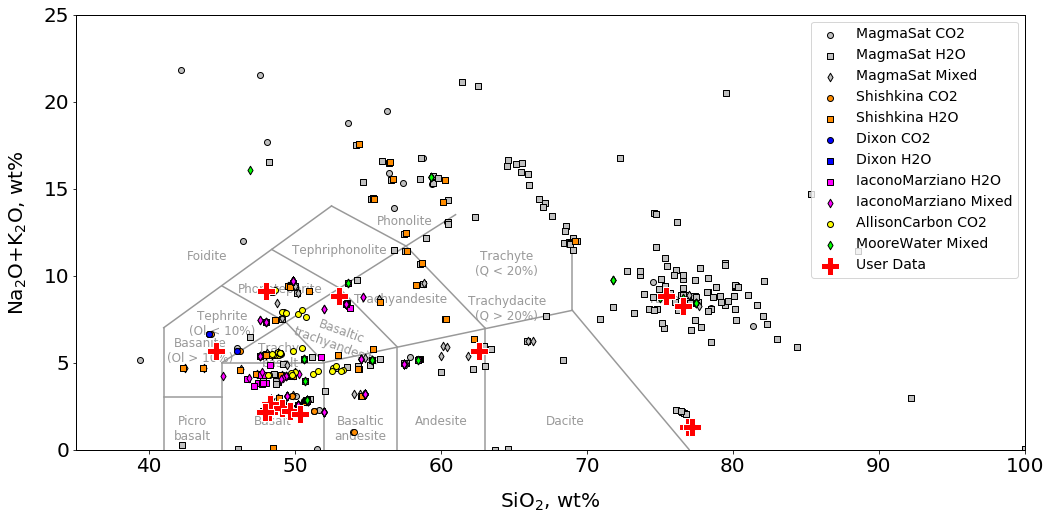

In [7]:
v.calib_plot(user_data=myfile)

Figure 3b.

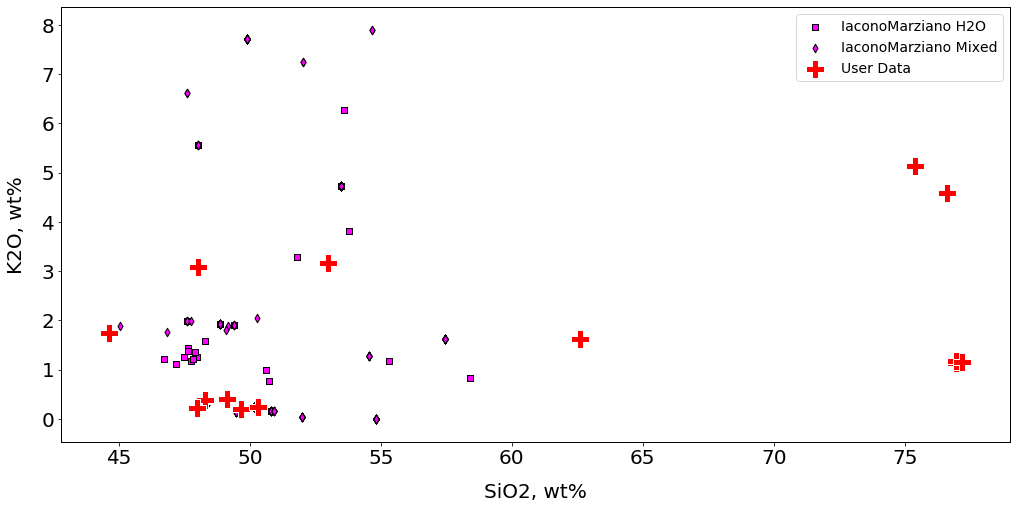

In [8]:
v.calib_plot(user_data=myfile, model='IaconoMarziano', plot_type='xy', x='SiO2', y='K2O', save_fig=False)

*Figure 3: Example calibration plots. 3a. The default plot with user_data defined as myfile and no other options set. This produces a TAS digram with the user data plotted atop data from calibration datasets for all models. 3b. A plot with all options specified. This example produces an x-y plot for user_data (myfile) and the Moore et al. (1998) calibration dataset where x and y are SiO2 and MgO concentration in wt%.*

Using the functionality built into python and the matplotlib library, user data can be plotted on its own at any time, including before any calculations are performed. Almost any plot type imaginable can be produced, and users should refer to the maptlotlib documentation (https://matplotlib.org/3.2.1/index.html) if more complex plotting is desired. 

<a id='extracting_single_melt_composition'></a>

### 3.1.4 Extracting a single sample from an Excel file
Defined within the `ExcelFile()` class, the method `get_sample_oxide_comp()` allows for the extraction of a melt composition from a loaded excel file.

**Method structure:** `def get_sample_oxide_comp(self, sample, norm='none')`

**Required inputs:**<br>
>`sample`: The name of the sample, as a string, as defined in the 'Label' column of the input excel file.

**Optional inputs:**<br>
>`norm`: This is optional and determines the style of normalization performed on a sample. The default value is `'none'`, which returns the value-for-value un-normalized composition. Passing `'standard'` returns the composition normalized to 100%, including any volatiles. Passing `'fixedvolatiles'` normalizes the oxides to 100%, but volatiles remain fixed while other major element oxides are reduced proporitonally so that the total is 100 wt%. Passing `'additionalvolatiles'` normalizes oxides to 100% assuming the sample is volatile-free. If H$_2$O or CO$_2$ concentrations are passed to the function, their un-normalized values will be retained in addition to the normalized non-volatile oxides, summing to >100%.

**Outputs:**<br>
>The bulk composition stored in a dictionary, with values in wt%.

In [9]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'AW-46'
extracted_bulk_comp = myfile.get_sample_oxide_comp(SampleName)

"""To see the extracted sample composition, uncomment the line below and execute this code cell"""
#extracted_bulk_comp

"""To see the sum of the composition, uncomment the line below and execute this code cell"""
#sum(extracted_bulk_comp.values())

'To see the sum of the composition, uncomment the line below and execute this code cell'

In some cases, it may be desired to simply retrieve a sample composition and use it elsewhere. In case normalization is desired, the 'norm' variable can be defined. To specify a normalization style, for example the 'fixedvolatiles' normalization routine, the above code could instead be written as:<br>
`extracted_bulk_comp = myfile.get_sample_oxide_comp(SampleName, norm='fixedvolatiles')`

This normalization is not necessary if the sample composition will be used in other VESIcal calculations, since any necessary pre-processing is performed automatically.

<a id='normalizing_transforming_data'></a>

### 3.1.5 Normalizing and transforming data

Before performing model calculations on your data, it may be desired to normalize the input composition to a total of 100 wt%. VESIcal has multiple methods for normalizing sample data using various routines. Normalization can be done automatically when retrieving a single sample from an Excel file, as detailed above. Each of the normalization routines can be accessed by the user at any time to normalize either a signle sample or all samples in an ExcelFile object. 

All three normalization functions can take in either a single composition as a dictionary or multiple compositions either as an ExcelFile object or a pandas DataFrame object (e.g., `yourexcelfile` or `yourexcelfile.data`). The standard normalize functino returns the composition normalized to 100%, including any volatiles. The FixedVolatiles function normalizes the oxides to 100%, but volatiles remain fixed while other major element oxides are reduced proporitonally so that the total is 100 wt%. The AdditionalVolatiles function normalizes oxides to 100% assuming the sample is volatile-free. If H$_2$O or CO$_2$ concentrations are passed to the function, their un-normalized values will be retained in addition to the normalized non-volatile oxides, summing to >100%.

**Method structures:** `def normalize(sample)`, `def normalize_FixedVolatiles(sample)`, `def normalize_AdditionalVolatiles(sample)`

**Required inputs:**<br>
>`sample` can be a dictionary containing compositional data for a single sample, an ExcelFile object containing compositional data for multiple samples, or a pandas DataFrame object containing compositional data for multiple samples. Examples are shown for all three cases below.

**Outputs:**<br>
>If a single composition is passed, a dictionary or pandas Series is returned. If multiple compositions are passed, a pandas DataFrame object is returned.

In any of the below examples, `myfile`, `myfile.data`, or `my_sample` can all be passed to any function.

In [10]:
"""Standard normalization"""
standard = v.normalize(myfile)
#print(standard)

"""FixedVolatiles normalization"""
fixed = v.normalize_FixedVolatiles(myfile)
#print(fixed)

"""AdditionalVolatiles normalization"""
additional = v.normalize_AdditionalVolatiles(myfile)
#print(additional)

<a id='table2'></a>

### Table 2. Viewing extracted sample composition
The user may wish to print extracted sample composition to a terminal or notebook cell to verify that the correct data was extracted. Using the current example, this can be done simpy by typing `print(extracted_bulk_comp)`. However, VESIcal also has a built in function to display these values as a table, rather than as a list of values.

The `printTable(myDict)` function takes in any python dictionary and converts it to a pandas DataFrame, which can then be displayed in an aesthetically pleasing format.

**Method structure:** `def printTable(myDict)`

**Required inputs:**<br>
>`myDict` is any python dictionary

**Outputs:**<br>
>A pandas DataFrame is returned.

In [11]:
"""Execute the following line to print the data as a list of values"""
print(extracted_bulk_comp)

"""Execute the following line to display Table 2 and print the data as a table."""
v.printTable(extracted_bulk_comp)

{'SiO2': 52.98, 'TiO2': 2.18, 'Al2O3': 20.49, 'Fe2O3': 0.0, 'Cr2O3': 0.0, 'FeO': 5.54, 'MnO': 0.2, 'MgO': 2.0, 'NiO': 0.0, 'CoO': 0.0, 'CaO': 7.1, 'Na2O': 5.68, 'K2O': 3.16, 'P2O5': 0.66, 'H2O': 4.76, 'CO2': 0.3439}


,value
SiO2,52.9800
TiO2,2.1800
Al2O3,20.4900
Fe2O3,0.0000
Cr2O3,0.0000
FeO,5.5400
MnO,0.2000
MgO,2.0000
NiO,0.0000
CoO,0.0000


<a id='calculating_dissolved_volatile_concentrations'></a>

## 3.2. Calculating dissolved volatile concentrations
<hr style="background-color: #a2b969;height: 8.0px;"/>

The `calculate_dissolved_volatiles()` function calcutions the concentration of dissolved H$_2$O and CO$_2$ in the liquid at a given pressure-temperature condition and with a given H$_2$O-CO$_2$ fluid composition, defined as the mole fraction of H$_2$O in an H$_2$O-CO$_2$ fluid (XH$_2$O$^{fluid}$). The default MagmaSat model relies on the underlying functionatlity of MELTS, whose basic function is to calculate the equilibrium phase assemblage given the bulk composition of the system and pressure-temperature conditions. To calculate dissolved volatile concentrations thus requires computing the equilibrium state of a system at fixed pressure and temperature over a range of bulk volatile concentrations until a solution is found that satisfies the user defined fluid composition.

First, the function makes an initial guess at the appropriate bulk volatile concentrations by finding the minimum dissolved volatile concentrations in the liquid at saturation, while asserting that the weight fraction of H$_2$O/$\Sigma$volatiles in the system is equal to the user input mole fraction of H$_2$O/$\Sigma$volatiles in the fluid. This is done by increasing the H$_2$O and CO$_2$ concentrations appropriately until a fluid phase is stable. Once fluid saturation is determined, the code then performs directional, iterative, and progressively more refined searches, increasing the proportion of H$_2$O or CO$_2$ in the system if the mole fraction of H$_2$O calculated in the fluid is greater than or less than that defined by the user, respectively. Four iterative searches are performed; the precision of the match between the calculated and defined XH$_2$O$^{fluid}$ increases from 0.1 in the first iteration to 0.01, 0.001, and finally to 0.0001. Thus, the calculated dissolved volatile concentrations correspond to a system with XH$_2$O$^{fluid}$ within 0.0001 of the user defined value.

#SimonTODO can you write more details about how the other functions calculate dissolved volatiles? It's much more straightforward with the other models, since you can directly access fugacity, etc.

**Method structure:**<br>
> Single sample: `calculate_dissolved_volatiles(self, sample, temperature, pressure, X_fluid=1, verbose=False).result`

>ExcelFile batch process: `calculate_dissolved_volatiles(self, temperature, pressure, X_fluid=1, print_status=False)`

**Required inputs:**<br>
>`sample`: *Only for single-sample calculations.* The composition of a sample. A single sample may be passed as a dictionary of values, with compositions of oxides in wt%.

>`temperature`, `pressure`, and `X_fluid`: the temperature in $^{\circ}$C, the pressure in bars, and the mole fraction of H$_2$O in the H$_2$O-CO$_2$ fluid, XH$_2$O$^{fluid}$. Temperature and pressure of the sample or samples must be passed unless an ExcelFile object with a column for temperature and/or pressure is passed to `sample`. XH$_2$O$^{fluid}$ is optional, with a default value of 1 (pure H$_2$O fluid). If a numerical (float) value is passed for either temperature, pressure, or X_fluid, that will be the value used for one or all samples. If, alternatively, the user wishes to use temperature, pressure, and/or X_fluid information in their ExcelFile object, the title of the column containing temperature, pressure, or X_fluid data should be passed in quotes (as a string) to `temperature`,  `pressure`, and/or `X_fluid`, respectively. Note for batch calculations that if temperature, pressure, or XH$_2$O$^{fluid}$ information exists in the ExcelFile but a single numerical value is defined for one or both of these variables, both the original information plus the values used for the calculations will be returned.

**Optional inputs:**<br>
>`verbose`: *Only for single-sample calculations.* Default value is False. If set to True, additional parameters are returned in a dictionary: H$_2$O and CO$_2$ concentrations in the fluid in mole fraction, temperature, pressure, and proportion of the fluid in the system in wt%.

> `print_status`: *Only for ExcelFile batch calcualtions.* The default value is False. If True is passed, the progress of the calculation will be printed to the terminal. The user may desire to see the status of the calculation, as this particular function can be quite slow, averaging between 3-5 seconds per sample. #TODO test this more and verify average compute time.

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, a dictionary with keys 'H2O' and 'CO2' corresponding to the calculated dissolved H$_2$O and CO$_2$ concentrations in the liquid is returned (plus additional variables 'temperature' in $^{\circ}$C, 'pressure' in bars, 'XH2O_fl', 'XCO2_fl', and 'FluidProportion_wtper' (the proportion of the fluid in the system in wt%) if `verbose` is set to True). 

>If mutliple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated dissolved H$_2$O and CO$_2$ concentrations in the liquid, the fluid composition in mole fraction, and the proportion of the fluid in the system in wt%. Pressure (in bars) and Temperature (in $^{\circ}$C) columns are always returned.

In [12]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'AW-46'
bulk_comp = myfile.get_sample_oxide_comp(SampleName)

"""Calculate dissolved volatiles for the extracted sample"""
v.calculate_dissolved_volatiles(sample=bulk_comp, temperature=900.0, pressure=2000.0, 
                                X_fluid=0.5, verbose=True).result

{'temperature': 900.0,
 'pressure': 2000.0,
 'H2O_liq': 3.15536392706009,
 'CO2_liq': 0.0840345006191277,
 'XH2O_fl': 0.500019009367537,
 'XCO2_fl': 0.499980990632463,
 'FluidProportion_wt': 0.1540974162076257}

In [13]:
"""Calculate dissolved for all samples in an ExcelFile object"""
dissolved = myfile.calculate_dissolved_volatiles(temperature=900.0, pressure=2000.0, X_fluid=1, print_status=True)

Calculating sample Kil3-6_1a
Calculating sample Kil3-6_3a
Calculating sample Kil3-6_4a
Calculating sample 10*
Calculating sample 19*
Calculating sample 25
Calculating sample SAT-M12-1
Calculating sample SAT-M12-2
Calculating sample SAT-M12-4
Calculating sample samp. P1968
Calculating sample samp. P1968
Calculating sample samp. P1968
Calculating sample samp. HPR3-1_XL-3
Calculating sample samp. HPR3-1_XL-4_INCL-1
Calculating sample AW-6
Calculating sample AW-46
Calculating sample KI-07


In [14]:
dissolved

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,Press,Temp,TotalAlkalis,H2O_liq_VESIcal,CO2_liq_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,X_fluid_input_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,62.5,1299.094712,2.162535,5.256561,0,900.0,2000.0,1,MagmaSat,
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,128.0,1283.419991,2.641526,5.417720,0,900.0,2000.0,1,MagmaSat,
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,124.5,1255.153759,2.398375,5.353421,0,900.0,2000.0,1,MagmaSat,
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.0,0.000000,2.160000,4.984021,0,900.0,2000.0,1,MagmaSat,
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.0,0.000000,2.190000,5.134419,0,900.0,2000.0,1,MagmaSat,
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.0,0.000000,2.040000,5.189068,0,900.0,2000.0,1,MagmaSat,
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,703.0,1100.000000,5.660000,5.810439,0,900.0,2000.0,1,MagmaSat,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1865.0,1100.000000,5.660000,5.810439,0,900.0,2000.0,1,MagmaSat,
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,2985.0,1050.000000,5.660000,5.810439,0,900.0,2000.0,1,MagmaSat,


<a id='calculating_equilibrium_fluid_compositions'></a>

## 3.3. Calculating equilibrium fluid compositions
<hr style="background-color: #f7931f;height: 8.0px;"/>

The `calculate_equilibrium_fluid_comp()` function calculates the composition of a fluid phase in equilibrium with a given silicate melt with known pressure, temperature, and dissolved H$_2$O and CO$_2$ concentrations. The calculation is performed simply by calculating the equilibrium state of the given sample at the given conditions and determining if that melt is fluid saturated. If the melt is saturated, fluid composition and mass are reported back. If the calculation finds that the melt is not saturated at the given pressure and temperature, values of 0.0 will be returned for the H$_2$O and CO$_2$ concentrations in the fluid.

#SimonTODO can you write more details about how the other functions calculate equilibrium fluid comps?

**Method structure:**<br>
>Single sample: `calculate_equilibrium_fluid_comp(self, sample, temperature, pressure, verbose=False).result`

>ExcelFile batch process: `calculate_equilibrium_fluid_comp(self, temperature, pressure, print_status=False, model='MagmaSat')`

**Required inputs:**<br>
>`sample`: *Only for single-sample calculations.* The composition of a sample. A single sample may be passed as a dictionary of values, with compositions of oxides in wt%.

>`temperature` and `pressure`: the temperature in $^{\circ}$C and the pressure in bars. Temperature and pressure of the sample or samples must be passed unless an ExcelFile object with a column for temperature and/or pressure is passed to `sample`. If a numerical (float) value is passed for either temperature or pressure, that will be the value used for one or all samples. If, alternatively, the user wishes to use temperature and/or pressure information in their ExcelFile object, the title of the column containing temperature or pressure data should be passed in quotes (as a string) to `temperature` and `pressure`, respectively. Note for batch calculations that if pressure or temperature information exists in the ExcelFile but a single numerical value is defined for one or both of these variables, both the original pressure and temperature information plus the pressure and temperature values used for the calculations will be returned.

**Optional inputs:**<br>
>`verbose`: *Only for single-sample calculations.* Default value is False. If set to True, additional parameters are returned in a dictionary: H$_2$O and CO$_2$ concentrations in the fluid, mass of the fluid in grams, and proportion of the fluid in the system in wt%. 

>`print_status`: *Only for ExcelFile batch calcualtions.* The default value is False. If True is passed, the progress of the calculation will be printed to the terminal.

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, a dictionary with keys 'H2O' and 'CO2' is returned (plus additional variables 'FluidMass_grams' and 'FluidProportion_wtper' if `verbose` is set to True). 

>If mutliple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated equilibrium fluid compositions, mass of the fluid in grams, and proportion of the fluid in the system in wt%. Pressure (in bars) and Temperature (in $^{\circ}$C) columns are always returned.

In [15]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'AW-46'
bulk_comp = myfile.get_sample_oxide_comp(SampleName)

"""Calculate fluid composition for the extracted sample"""
v.calculate_equilibrium_fluid_comp(sample=bulk_comp, temperature=900.0, pressure=100.0).result

{'CO2': 0.0354257767845088, 'H2O': 0.964574223215491}

Below we calculate equilibrium fluid compositions for all samples at a single temperature of 900 $^{\circ}$C and a single pressure of 1000 bars. Note that some samples in this dataset have quite low volatile concentrations (e.g., the Tucker et al. (2019) basalts from Kilauea), and so are below saturation at this P-T condition. The fluid composition for undersaturated samples is returned as values of 0 for both H$_2$O and CO$_2$.

In [16]:
"""Calculate fluid composition for all samples in an ExcelFile object"""
eqfluid = myfile.calculate_equilibrium_fluid_comp(temperature=900.0, pressure=1000.0)
eqfluid

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,CO2,Press,Temp,TotalAlkalis,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,0.002873,62.5,1299.094712,2.162535,0.000000,0.000000,900.0,1000.0,MagmaSat,
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,0.006786,128.0,1283.419991,2.641526,0.000000,0.000000,900.0,1000.0,MagmaSat,
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,0.004984,124.5,1255.153759,2.398375,0.000000,0.000000,900.0,1000.0,MagmaSat,
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.047900,0.0,0.000000,2.160000,0.984531,0.015469,900.0,1000.0,MagmaSat,
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.111300,0.0,0.000000,2.190000,0.974997,0.025003,900.0,1000.0,MagmaSat,
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.043700,0.0,0.000000,2.040000,0.990107,0.009893,900.0,1000.0,MagmaSat,
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.000000,703.0,1100.000000,5.660000,0.000000,0.000000,900.0,1000.0,MagmaSat,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.000000,1865.0,1100.000000,5.660000,NaN,NaN,900.0,1000.0,MagmaSat,Calculation Failed.
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.000000,2985.0,1050.000000,5.660000,NaN,NaN,900.0,1000.0,MagmaSat,Calculation Failed.


In [17]:
"""Calculate fluid composition for all samples with unique pressure and temperature values for each sample.
Pressure and temperature values are taken from columns named "Press" and "Temp" in the example ExcelFile"""

eqfluid_wtemps = myfile.calculate_equilibrium_fluid_comp(temperature='Temp', pressure='Press')
eqfluid_wtemps

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,P2O5,H2O,CO2,Press,Temp,TotalAlkalis,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,0.210479,0.424695,0.002873,62.5,1299.094712,2.162535,0.586164,0.413836,MagmaSat,
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,0.204452,0.425984,0.006786,128.0,1283.419991,2.641526,0.286160,0.713840,MagmaSat,
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,0.238996,0.437758,0.004984,124.5,1255.153759,2.398375,0.000000,0.000000,MagmaSat,
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.170000,4.500000,0.047900,0.0,0.000000,2.160000,NaN,NaN,MagmaSat,No temperature and/or pressure data found. Sam...
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.170000,5.100000,0.111300,0.0,0.000000,2.190000,NaN,NaN,MagmaSat,No temperature and/or pressure data found. Sam...
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.230000,5.200000,0.043700,0.0,0.000000,2.040000,NaN,NaN,MagmaSat,No temperature and/or pressure data found. Sam...
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.240000,2.620000,0.000000,703.0,1100.000000,5.660000,0.000000,0.000000,MagmaSat,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.240000,5.030000,0.000000,1865.0,1100.000000,5.660000,0.000000,0.000000,MagmaSat,
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.240000,6.760000,0.000000,2985.0,1050.000000,5.660000,0.000000,0.000000,MagmaSat,


<a id='converting_fluid_composition_units'></a>

### 3.3.1. Converting fluid composition units
The fluid composition is always returned in units of mol fraction. Two functions exist to transform only the H$_2$O-CO$_2$ fluid composition between mol fraction and wt% and can easily be applied to returned data sets from calculations. Both functions require that the user provide the dataframe containing fluid composition information plus the names of the columns corresponding to the H$_2$O and CO$_2$ concentrations in the fluid. The default values for column names are set to those that may be returned by VESIcal core calculations, such that they need not be specified unless the user has change them or is supplying their own data (e.g., imported data not processed through a core calcuation).

**Method structure:**<br>
>Mol fraction to wt%: `fluid_molfrac_to_wt(data, H2O_colname='XH2O_fl_VESIcal', CO2_colname='XCO2_fl_VESIcal')`

>Wt% to mol fraction: `fluid_wt_to_molfrac(data, H2O_colname='H2O_fl_wt', CO2_colname='CO2_fl_wt')`

**Required inputs:**<br>
>`data`: A pandas DataFrame containing columns for H$_2$O and CO$_2$ concentrations in the fluid.

**Optional inputs:**<br>
>`H2O_colname` and `CO2_colname`: The default values are 'XH2O_fl' and 'XCO2_fl' if input data are in mol fraction or 'H2O_fl_wt' and 'CO2_fl_wt' if the data are in wt%. Strings containing the name of the columns corresponding to the H$_2$O and CO$_2$ concentrations in the fluid.

**Calculated outputs:**<br>
>The original data passed plus newly calculated values are returned in a DataFrame.

In [18]:
"""Converting from mol fraction to wt%"""
eqfluid_wt = v.fluid_molfrac_to_wt(eqfluid)
eqfluid_wt

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,Temp,TotalAlkalis,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings,H2O_fl_wt,CO2_fl_wt
Label,,,,,,,,,,,,,,,,,,,,,
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,1299.094712,2.162535,0.000000,0.000000,900.0,1000.0,MagmaSat,,NaN,NaN
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,1283.419991,2.641526,0.000000,0.000000,900.0,1000.0,MagmaSat,,NaN,NaN
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,1255.153759,2.398375,0.000000,0.000000,900.0,1000.0,MagmaSat,,NaN,NaN
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.000000,2.160000,0.984531,0.015469,900.0,1000.0,MagmaSat,,96.304445,3.695555
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.000000,2.190000,0.974997,0.025003,900.0,1000.0,MagmaSat,,94.106168,5.893832
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.000000,2.040000,0.990107,0.009893,900.0,1000.0,MagmaSat,,97.617908,2.382092
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1100.000000,5.660000,0.000000,0.000000,900.0,1000.0,MagmaSat,,NaN,NaN
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1100.000000,5.660000,NaN,NaN,900.0,1000.0,MagmaSat,Calculation Failed.,NaN,NaN
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1050.000000,5.660000,NaN,NaN,900.0,1000.0,MagmaSat,Calculation Failed.,NaN,NaN


In [19]:
"""Converting from wt% to mol fraction"""
eqfluid_mol = v.fluid_wt_to_molfrac(eqfluid_wt)
eqfluid_mol

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings,H2O_fl_wt,CO2_fl_wt,XH2O_fl,XCO2_fl
Label,,,,,,,,,,,,,,,,,,,,,
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,0.000000,0.000000,900.0,1000.0,MagmaSat,,NaN,NaN,NaN,NaN
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,0.000000,0.000000,900.0,1000.0,MagmaSat,,NaN,NaN,NaN,NaN
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,0.000000,0.000000,900.0,1000.0,MagmaSat,,NaN,NaN,NaN,NaN
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.984531,0.015469,900.0,1000.0,MagmaSat,,96.304445,3.695555,0.984531,0.015469
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.974997,0.025003,900.0,1000.0,MagmaSat,,94.106168,5.893832,0.974997,0.025003
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.990107,0.009893,900.0,1000.0,MagmaSat,,97.617908,2.382092,0.990107,0.009893
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.000000,0.000000,900.0,1000.0,MagmaSat,,NaN,NaN,NaN,NaN
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,NaN,NaN,900.0,1000.0,MagmaSat,Calculation Failed.,NaN,NaN,NaN,NaN
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,NaN,NaN,900.0,1000.0,MagmaSat,Calculation Failed.,NaN,NaN,NaN,NaN


<a id='calculating_saturation_pressures'></a>

## 3.4. Calculating saturation pressures
<hr style="background-color: #4cc1ef;height: 8.0px;"/>

The `calculate_saturation_pressure()` function calculates the minimum pressure at which a given silicate melt with known temperature and H$_2$O and CO$_2$ concentrations would be saturated with fluid. This is calcualted by finding the pressure at which the smallest amount of vapor is present. This function also calculates the composition of the vapor in equilibrium with the melt at those conditions.

The function works by calculating the equilibrium state of the given melt at very high pressure (20,000 bars) and then decreasing the pressure in steps of 1,000 bars until the mass of vapor is >0 grams. At this point, the pressure space is narrowed and searched in steps of 100 bars and then in steps of 10 bars until the saturation pressure is found. Thus, these calculations are accurate to 10 bars.

**Method structure:**<br>
>Single sample: `calculate_saturation_pressure(self, sample, temperature, verbose=False).result`

>ExcelFile batch process: `calculate_saturation_pressure(self, temperature, print_status=False)`

**Required inputs:**<br>
> `sample`: *Only for single-sample calculations.* The composition of the melt, inclusing the H$_2$O and CO$_2$ concentrations, in wt%.

> `temperature`: The temperature in °C. For ExcelFile batch calculations, if temperature information is present in the ExcelFile (e.g., as a column with unique temperature values for each sample), this can be accessed by passing the column name in quotes to the temperature variable.

**Optional inputs:**<br>
> `verbose`: *Only for single-sample calculations.* Default value is False. If set to True, additional parameters are returned in a dictionary: saturation pressure in bars, H$_2$O and CO$_2$ concentrations in the fluid, mass of the fluid in grams, and proportion of the fluid in the system in wt%.

> `print_status`: *Only for ExcelFile batch calcualtions.* The default value is False. If True is passed, the progress of the calculation will be printed to the terminal.

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, the saturation pressure in bars is returned as a numerical value (float) (plus additional variables 'XH2O_fl', 'XCO2_fl', 'FluidMass_grams', and 'FluidProportion_wtper' if `verbose` is set to True). 

>If mutliple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated saturation pressures, equilibrium fluid compositions, mass of the fluid in grams, and proportion of the fluid in the system in wt%. Temperature (in $^{\circ}$C) is always returned.

In [20]:
"""Calculate the saturation pressure of the single sample we defined in Section 3.1.2 at 925 degrees C"""
v.calculate_saturation_pressure(sample=my_sample, temperature=925.0, verbose=True).result

{'SaturationP_bars': 2720,
 'FluidMass_grams': 0.0016655984224872,
 'FluidProportion_wt': 0.0015635017577088073,
 'XH2O_fl': 0.825802671679744,
 'XCO2_fl': 0.174197328320256}

In [21]:
"""Calculate the saturation pressure for all samples in an ExcelFile object at 925 degrees C"""
satPs = myfile.calculate_saturation_pressure(temperature=925.0, model="Dixon")
satPs

../VESIcal.py:3382: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,P2O5,H2O,CO2,Press,Temp,TotalAlkalis,SaturationP_bars_VESIcal,Temperature_C_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,0.210479,0.424695,0.002873,62.5,1299.094712,2.162535,72.991625,925.0,Dixon,
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,0.204452,0.425984,0.006786,128.0,1283.419991,2.641526,152.981864,925.0,Dixon,
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,0.238996,0.437758,0.004984,124.5,1255.153759,2.398375,149.221876,925.0,Dixon,
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.170000,4.500000,0.047900,0.0,0.000000,2.160000,3915.289506,925.0,Dixon,
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.170000,5.100000,0.111300,0.0,0.000000,2.190000,4879.510121,925.0,Dixon,
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.230000,5.200000,0.043700,0.0,0.000000,2.040000,4681.392443,925.0,Dixon,
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.240000,2.620000,0.000000,703.0,1100.000000,5.660000,965.602559,925.0,Dixon,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.240000,5.030000,0.000000,1865.0,1100.000000,5.660000,4277.099521,925.0,Dixon,
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.240000,6.760000,0.000000,2985.0,1050.000000,5.660000,6360.273159,925.0,Dixon,


In [22]:
"""Calculate the saturation pressure for all samples in an ExcelFile object, taking temperature
values from a column named "Temp" in the ExcelFile"""
satPs_wtemps = myfile.calculate_saturation_pressure(temperature="Temp")
satPs_wtemps

Calculating sample Kil3-6_1a
Calculating sample Kil3-6_3a
Calculating sample Kil3-6_4a
Calculating sample 10*
Calculating sample 19*
Calculating sample 25
Calculating sample SAT-M12-1
Calculating sample SAT-M12-2
Calculating sample SAT-M12-4
Calculating sample samp. P1968
Calculating sample samp. P1968
Calculating sample samp. P1968
Calculating sample samp. HPR3-1_XL-3
Calculating sample samp. HPR3-1_XL-4_INCL-1
Calculating sample AW-6
Calculating sample AW-46
Calculating sample KI-07
Done!


,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,Press,Temp,TotalAlkalis,SaturationP_bars_VESIcal,XH2O_fl_VESIcal,XCO2_fl_VESIcal,FluidMass_grams_VESIcal,FluidSystem_wt_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,62.5,1299.094712,2.162535,70.0,0.525553,0.474447,0.000710,0.000797,MagmaSat,
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,128.0,1283.419991,2.641526,130.0,0.281991,0.718009,0.000449,0.000504,MagmaSat,
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,124.5,1255.153759,2.398375,110.0,0.344636,0.655364,0.000370,0.000415,MagmaSat,
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.0,0.000000,2.160000,NaN,NaN,NaN,NaN,NaN,MagmaSat,No temperature data found. Sample skipped.
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.0,0.000000,2.190000,NaN,NaN,NaN,NaN,NaN,MagmaSat,No temperature data found. Sample skipped.
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.0,0.000000,2.040000,NaN,NaN,NaN,NaN,NaN,MagmaSat,No temperature data found. Sample skipped.
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,703.0,1100.000000,5.660000,560.0,1.000000,0.000000,0.022922,0.022601,MagmaSat,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1865.0,1100.000000,5.660000,1560.0,1.000000,0.000000,0.003315,0.003193,MagmaSat,
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,2985.0,1050.000000,5.660000,2390.0,1.000000,0.000000,0.018688,0.017704,MagmaSat,


<a id='calculating_plotting_isobars_isopleths'></a>

## 3.5. Calculating and plotting isobars and isopleths
<hr style="background-color: #ffcc4c;height: 8.0px;"/>

In this example, we demonstrate how isobars (lines of constant pressure) and isopleths (lines of constant fluid composition) can be calculated for any one composition. A single melt composition can be extracted from a loaded excel file, or a composition can be enterred by hand an stored within a dictionary. Due to computational intensity, isobars and isopleths can only be computed for one sample composition at a time.

Once a single composition is defined, conditions over which to calculate isobars and isopleths must be specified. The generated plot is isothermal, so only one temperature can be chosen. Isobars can be calculated for any number of pressures, passed as a list.

The calculation is performed by iterating through possible concentrations of H$_2$O and CO$_2$ and calculating the equilibrium state for the system. The iteration begins at a fixed H$_2$O concentration, increasing the CO$_2$ concentration in steps of 0.1 wt% until a fluid phase is stable. The H$_2$O concentration is then increased by 0.5 wt% and CO$_2$ is again increased from 0 until a fluid phase is stable. This process is repeated for H$_2$O values ranging from 0–15 wt%. The H$_2$O and CO$_2$ concentrations from each system for which a fluid phase was found to be stable are saved and written to a pandas DataFrame, which is returned upon completion of the calculation.

**Method structure:**<br>
>*Only single-sample calculations.* `calculate_isobars_and_isopleths(self, sample, temperature, pressure_list, isopleth_list, print_status=False).result`

**Required inputs:**<br>
>`sample`: The sample composition, as a dictionary with values in wt%

>`temperature`: The temperature in $^{\circ}$C. 

>`pressure_list`: A list of all pressures in bars at which to calculate isobars.

**Optional inputs:**<br>
>`isopleth_list`: The default value is None in which case only isobars will be calcualted. A list of all fluid composition values, in mole fraction H$_2$O (XH$_2$O$^{fluid}$), at which to calculate isopleths. Values can range from 0–1.

>`print_status`: The default value is False. If set to `True`, the progress of the calculations will be printed to the terminal.

**Calculated outputs:** 
>The function returns two pandas DataFrames: the first has isobar data, and the second has isopleth data. Columns in the isobar dataframe are 'Pressure', 'H2Omelt', and 'CO2melt', correpsonding to pressure in bars and dissolved H$_2$O and CO$_2$ in the liquid in wt%. Columns in the isopleth dataframe are 'XH2O_fl', 'H2O_liq', and 'CO2_liq', corresponding to XH$_2$O$^{fluid}$ and dissolved H$_2$O and CO$_2$ in the liquid in wt%.

In [23]:
"""To get composition from a specific sample in the input data:"""
SampleName = '10*'
bulk_comp = myfile.get_sample_oxide_comp(SampleName, norm='standard')

"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1200.0

"""Define a list of pressures in bars:"""
pressures = [1000.0, 2000.0, 3000.0]

Next, the H$_2$O and CO$_2$ dissolved in the melt at saturation is calculated at the specified temperature and over the range of specified pressures. The user does not need to change anything in the below cell. This calculation can be quite slow, and so it is recommended to set print_status to True.

In [24]:
isobars, isopleths = v.calculate_isobars_and_isopleths(sample=bulk_comp, 
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.25,0.5,0.75],
                                            print_status=True).result

Calculating isobar at 1000.0 bars
Calculating isopleth at 0
Calculating isopleth at 0.25
Calculating isopleth at 0.5
Calculating isopleth at 0.75
Calculating isopleth at 1
Calculating isobar at 2000.0 bars
Calculating isopleth at 0
Calculating isopleth at 0.25
Calculating isopleth at 0.5
Calculating isopleth at 0.75
Calculating isopleth at 1
Calculating isobar at 3000.0 bars
Calculating isopleth at 0
Calculating isopleth at 0.25
Calculating isopleth at 0.5
Calculating isopleth at 0.75
Calculating isopleth at 1
Done!


<a id='plotting_isobars_isopleths'></a>

### 3.5.1. Plotting isobars and isopleths

Once isobars and isopleths are calculated, they can be plotted in an H$_2$O versus CO$_2$ plot with one simple function call. The plot will be printed directly in the notebook or, if the code is run as script in a command line, the plot will appear it its own window, at which point it can be saved as an image file. The `plot_isobars_and_isopleths` function takes in a pandas DataFrame with calculated isobar and isopleth information (e.g., output from calculate_isobars_and_isopleths) and plots data as isobars (lines of constant pressure) and isopleths (lines of constant fluid composition). These lines represent the saturation pressures of the melt composition used to calculate the isobar and isopleth information. 

**Method structure:**<br>
>*Only single-sample calculations.* `def plot_isobars_and_isopleths(self, isobars, isopleths)`

**Required inputs:**<br>
>`isobars`: Pandas DataFrame object containing isobar information as calculated by calculate_isobars_and_isopleths.

>`isopleths`: Pandas DataFrame object containing isopleth information as calculated by calculate_isobars_and_isopleths.

**Calculated outputs:** 
>The function returns a matplotlib object with the x-axis as H2O wt% in the melt and y-axis as CO2 wt% in the melt. Isobars, or lines of constant pressure at which the sample magma composition is saturated, and isopleths, or lines of constant fluid composition at which the sample magma composition is saturated, are plotted.

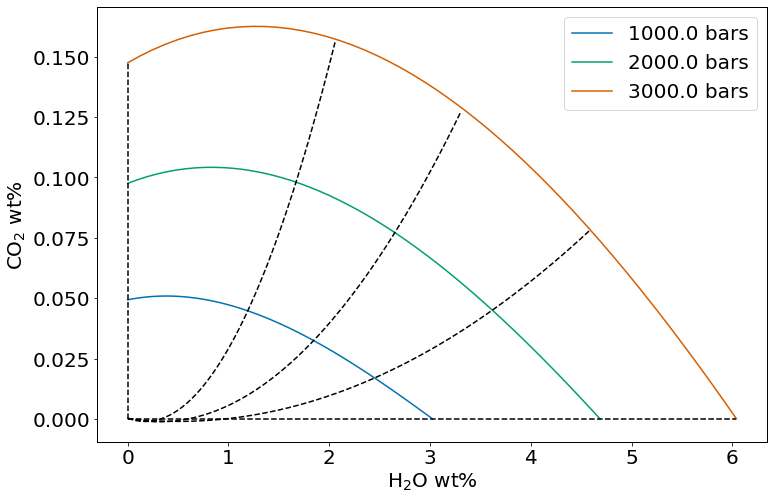

In [25]:
v.plot_isobars_and_isopleths(isobars, isopleths)

However, the user may wish to apply custom formatting to the plot, in which case, an example code to plot isobars and isopleths is provided below.

In [26]:
display(tag)
"""Show this cell's raw code input to see the example code"""

# # #-----------------------CODE TO PLOT ISOBARS AND ISOPLETHS-----------------#
# P_vals = isobars.Pressure.unique() #grab all unique pressure values
# XH2O_vals = isopleths.XH2O_fl.unique() #grab all unique XH2O values
# isobars_lists = isobars.values.tolist() #transform isobar dataframe into a list of lists
# isopleths_lists = isopleths.values.tolist() #transform isopleth dataframe into a list of lists

# # add zero values to volatiles list
# isobars_lists.append([0.0, 0.0, 0.0, 0.0])

# # draw the figure
# fig, ax1 = plt.subplots()
# plt.xlabel('H2O wt%')
# plt.ylabel('CO2 wt%')

# # do some data smoothing
# for pressure in P_vals:
#     Pxs = [item[1] for item in isobars_lists if item[0] == pressure]
#     Pys = [item[2] for item in isobars_lists if item[0] == pressure]

#     try:
#         np.seterr(divide='ignore', invalid='ignore') #turn off numpy warning
#         ## calcualte polynomial
#         Pz = np.polyfit(Pxs, Pys, 3)
#         Pf = np.poly1d(Pz)

#         ## calculate new x's and y's
#         Px_new = np.linspace(Pxs[0], Pxs[-1], 50)
#         Py_new = Pf(Px_new)

#         # Plot some stuff
#         ax1.plot(Px_new, Py_new)
#     except:
#         ax1.plot(Pxs, Pys)

# for Xfl in XH2O_vals:
#     Xxs = [item[1] for item in isopleths_lists if item[0] == Xfl]
#     Xys = [item[2] for item in isopleths_lists if item[0] == Xfl]

#     try:
#         ## calcualte polynomial
#         Xz = np.polyfit(Xxs, Xys, 2)
#         Xf = np.poly1d(Xz)

#         ## calculate new x's and y's
#         Xx_new = np.linspace(Xxs[0], Xxs[-1], 50)
#         Xy_new = Xf(Xx_new)

#         # Plot some stuff
#         ax1.plot(Xx_new, Xy_new, ls='dashed', color='k')
#     except:
#         ax1.plot(Xxs, Xys, ls='dashed', color='k')

# labels = P_vals
# ax1.legend(labels)

# np.seterr(divide='warn', invalid='warn') #turn numpy warning back on

# plt.show()

"Show this cell's raw code input to see the example code"

<a id='calculating_plotting_degassing_paths'></a>

## 3.6. Calculating and plotting degassing paths
<hr style="background-color: #c13017;height: 8.0px;"/>

A degassing path is a series of volatile concentrations both in the liquid and fluid that a magma will follow during decompression. In the calculation, the saturation pressure is computed, and then the system is equilibrated along a trajectory of decreasing pressure values at steps of 100 bars (or 10 bars if the starting pressure is <500 bars). If so desired, this calculation can be performed for any initial pressure, but the default is the saturation pressure. If a pressure is specified that is above the saturation pressure, the calculation will simlpy proceed from the saturation pressure, since the magma cannot degas until it reaches saturation. 

Completely open-system, completely closed-system or partially open-system degassing paths can be calculated by specifying what proportion of the fluid to fractionate. The fluid fractionation value can range between 0 (closed-system: no fluid is removed, all is retained at each pressure step) and 1 (open-system: all fluid is removed, none is retained at each pressure step). Closed and partially open-system runs allow the user to speficy the initial presence of exsolved fluid that is in equilirium with the melt at the starting pressure.

**Method structure:**<br>
>*Only single-sample calculations.* `calculate_degassing_path(self, sample, temperature, pressure='saturation', fractionate_vapor=0.0, init_vapor=0.0).result`

**Required inputs:**<br>
>`sample`: The sample composition, as a dictionary with values in wt%

>`temperature`: The temperature in $^{\circ}$C. 

**Optional inputs:**<br>
>`pressure`: The perssure at which to begin the degassing calculations, in bars. Default value is 'saturation', which runs the calculation with the initial pressure at the saturation pressure. If a pressure greater than the saturation pressure is input, the calculation will start at saturation, since this is the first pressure at which any degassing will occur.

>`fractionate_vapor`: Proportion of vapor removed at each pressure step. Default value is 0.0 (completely closed-system degassing). Specifies the type of calculation performed, either closed system (0.0) or open system (1.0) degassing. If any value between <1.0 is chosen, user can also specify the 'init_vapor' argument (see below). A value in between 0 and 1 will remove that proportion of vapor at each step. For example, for a value of 0.2, the calculation will remove 20% of the vapor and retain 80% of the vapor at each pressure step.

>`init_vapor`: Default value is 0.0. Specifies the amount of vapor (in wt%) coexisting with the melt before degassing.

**Calculated outputs:** 
>The function returns a pandas DataFrame with columns as: 'Pressure_bars', 'H2O_liq' and 'CO2_liq' (the concentration of H$_2$O and CO$_2$ in the liquid, in wt%), 'XH2O_fl' and 'XCO2_fl' (the composition of the H$_2$O-CO$_2$ fluid, in mol fraction), and 'FluidProportion_wt' (the proportion of fluid in the fluid-melt system, in wt%).

In [ ]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'AW-46'
bulk_comp = myfile.get_sample_oxide_comp(SampleName)
bulk_comp = v.normalize(bulk_comp)

temp = 1200 #temperature in °C

"""Calculate open, closed, and closed + 2 wt% initial vapor"""
closed_df = v.calculate_degassing_path(sample=bulk_comp, temperature=temp).result
open_df = v.calculate_degassing_path(sample=bulk_comp, temperature=temp, fractionate_vapor=1.0).result
half_df = v.calculate_degassing_path(sample=bulk_comp, temperature=temp, fractionate_vapor=0.5).result
exsolved_df = v.calculate_degassing_path(sample=bulk_comp, temperature=temp, init_vapor=2.0).result

In [ ]:
"""Calculate closed-system degassing starting from a pressure of 2000 bars"""
start2000_df = v.calculate_degassing_path(sample=bulk_comp, temperature=temp, pressure=2000.0).result

<a id='plotting_degassing_paths'></a>

### 3.6.1. Plotting degassing paths

Once degassing paths are calcualted, they may be easily plotted using VESIcal's built in `plot_degassing_paths` method. The user can plot multiple degassing paths on one plot. Optionally, labels in the plot legend can be specified.

**Method structure:**<br>
>`def plot_degassing_paths(degassing_paths, labels=None)`

**Required inputs:**<br>
>`degassing_paths`: A list of DataFrames with degassing information as generated by calculate_degassing_path().

**Optional inputs:**<br>
>`labels`: Labels for the plot legend. Default is None, in which case each plotted line will be given the generic legend name of "Pathn", with n referring to the nth degassing path passed. The user can pass their own labels as a list of strings.

**Calculated outputs:** 
>The function returns a matplotlib object with the x-axis as H$_2$O, wt% and the y-axis as CO$_2$, wt%. All degassing paths passed are plotted on one figure.

In [ ]:
v.plot_degassing_paths([open_df, half_df, closed_df, exsolved_df],
                       labels=["Open", "Half", "Closed", "Exsolved"])

v.plot_degassing_paths([exsolved_df, start2000_df],
                       labels=["Exsolved", "2000 bars"])

However, the user may wish to apply custom formatting to the plot, in which case, an example code to plot isobars and isopleths is provided below.

In [ ]:
display(tag)
"""Show this cell's raw code input to see the example code"""
# #-----------------------CODE TO PLOT DEGASSING PATHS-----------------#
# ax = open_df.plot(kind='line',x='H2O_liq',y='CO2_liq',color='red', label='Open System')
# half_df.plot(ax=ax, kind='line', x='H2O_liq', y='CO2_liq', color='purple', label='0.5 vapor')
# closed_df.plot(ax=ax, kind='line',x='H2O_liq',y='CO2_liq',color='blue', label='Closed System')
# exsolved_df.plot(ax=ax, kind='line', x='H2O_liq', y='CO2_liq',color='green', label='Closed System w/2 wt% Vapor')
# ax.scatter(bulk_comp["H2O"], bulk_comp["CO2"], color='black') #Plot original data point

# ax.set_xlabel("H2O, wt%")
# ax.set_ylabel("CO2, wt%")
# plt.show()

<a id='plotting_multiple_calculations'></a>

## 3.7. Plotting multiple calculations

One of the major advantages to VESIcal over any other model is the ability to quickly calculate and plot multiple calculations. In this example we will use data imported in Section 3.1 and calculations performed in Sections 3.5 and 3.6. Of course, all of the data calculated with VESIcal can be exported to an Excel file for manipulation and plotting as desired. However, some examples of plotting that can be done within this notebook or in a python script are shown below. There are no built-in functions for plotting more than one calculation, so the following examples use the code snippets for plotting various results given above.

<a id='degassing_paths_plus_isobars_isopleths'></a>

### 3.7.1. Degassing paths plus isobars and isopleths
The code below uses the example code snippets for plotting degassing paths and then for plotting isobars and isopleths. All calculations here were performed on sample BT-ex.

In [ ]:
#PLOT DEGASSING PATHS
ax = open_df.plot(kind='line',x='H2O_liq',y='CO2_liq',color='red', label='Open System')
half_df.plot(ax=ax, kind='line', x='H2O_liq', y='CO2_liq', color='purple', label='0.5 vapor')
closed_df.plot(ax=ax, kind='line',x='H2O_liq',y='CO2_liq',color='blue', label='Closed System')
exsolved_df.plot(ax=ax, kind='line', x='H2O_liq', y='CO2_liq',color='green', label='Closed System w/2 wt% Vapor')
ax.scatter(bulk_comp["H2O"], bulk_comp["CO2"], color='black') #Plot original data point

#PLOT ISOBARS
P_vals = isobars.Pressure.unique() #grab all unique pressure values
XH2O_vals = isopleths.XH2O_fl.unique() #grab all unique XH2O values
isobars_lists = isobars.values.tolist() #transform isobar dataframe into a list of lists
isopleths_lists = isopleths.values.tolist() #transform isopleth dataframe into a list of lists

# add zero values to volatiles list
isobars_lists.append([0.0, 0.0, 0.0, 0.0])

# do some data smoothing
for pressure in P_vals:
    Pxs = [item[1] for item in isobars_lists if item[0] == pressure]
    Pys = [item[2] for item in isobars_lists if item[0] == pressure]

    try:
        np.seterr(divide='ignore', invalid='ignore') #turn off numpy warning
        ## calcualte polynomial
        Pz = np.polyfit(Pxs, Pys, 3)
        Pf = np.poly1d(Pz)

        ## calculate new x's and y's
        Px_new = np.linspace(Pxs[0], Pxs[-1], 50)
        Py_new = Pf(Px_new)

        # Plot some stuff
        ax.plot(Px_new, Py_new)
    except:
        ax.plot(Pxs, Pys)

for Xfl in XH2O_vals:
    Xxs = [item[1] for item in isopleths_lists if item[0] == Xfl]
    Xys = [item[2] for item in isopleths_lists if item[0] == Xfl]

    try:
        ## calcualte polynomial
        Xz = np.polyfit(Xxs, Xys, 2)
        Xf = np.poly1d(Xz)

        ## calculate new x's and y's
        Xx_new = np.linspace(Xxs[0], Xxs[-1], 50)
        Xy_new = Xf(Xx_new)

        # Plot some stuff
        ax.plot(Xx_new, Xy_new, ls='dashed', color='k')
    except:
        ax.plot(Xxs, Xys, ls='dashed', color='k')

ax.set_xlabel("H2O, wt%")
ax.set_ylabel("CO2, wt%")
ax.set_title("Isobars and Isopleths & Degassing Paths for Sample 'BT-ex'")
plt.show()

<a id='sample_data_plus_isobars_isopleths'></a>

### 3.7.2 Sample data plus isobars and isopleths
The code below uses the example code snippets for plotting data imported from a file in Section 3.1 as well as for plotting isobars and isopleths for sample BT-ex.

In [ ]:
ax = plt.subplot()
ax.plot(data["H2O"],data["CO2"],'bo')

#PLOT ISOBARS
P_vals = isobars.Pressure.unique() #grab all unique pressure values
XH2O_vals = isopleths.XH2O_fl.unique() #grab all unique XH2O values
isobars_lists = isobars.values.tolist() #transform isobar dataframe into a list of lists
isopleths_lists = isopleths.values.tolist() #transform isopleth dataframe into a list of lists

# add zero values to volatiles list
isobars_lists.append([0.0, 0.0, 0.0, 0.0])

# do some data smoothing
for pressure in P_vals:
    Pxs = [item[1] for item in isobars_lists if item[0] == pressure]
    Pys = [item[2] for item in isobars_lists if item[0] == pressure]

    try:
        np.seterr(divide='ignore', invalid='ignore') #turn off numpy warning
        ## calcualte polynomial
        Pz = np.polyfit(Pxs, Pys, 3)
        Pf = np.poly1d(Pz)

        ## calculate new x's and y's
        Px_new = np.linspace(Pxs[0], Pxs[-1], 50)
        Py_new = Pf(Px_new)

        # Plot some stuff
        ax.plot(Px_new, Py_new)
    except:
        ax.plot(Pxs, Pys)

for Xfl in XH2O_vals:
    Xxs = [item[1] for item in isopleths_lists if item[0] == Xfl]
    Xys = [item[2] for item in isopleths_lists if item[0] == Xfl]

    try:
        ## calcualte polynomial
        Xz = np.polyfit(Xxs, Xys, 2)
        Xf = np.poly1d(Xz)

        ## calculate new x's and y's
        Xx_new = np.linspace(Xxs[0], Xxs[-1], 50)
        Xy_new = Xf(Xx_new)

        # Plot some stuff
        ax.plot(Xx_new, Xy_new, ls='dashed', color='k')
    except:
        ax.plot(Xxs, Xys, ls='dashed', color='k')

#ax.plot(data["H2O"], data["CO2"], 'o', color='blue')
ax.set_xlabel("H$_2$O, wt%")
ax.set_ylabel("CO$_2$, wt%")
ax.set_title("Isobars and Isopleths & Multi-sample Data")
plt.show()

## 3.8. Code hybridization (Advanced)
<a id='code_hybridization'></a>

One of the advantages of implementing the solubility models in a generic python module is the flexibility this affords the user in changing the way solubility models are defined and used. In particular, the structure allows any combination of pure-fluid models to be used together in modelling mixed-fluids, and fugacity or activity models can be quickly changed without modifying code. To access these more advanced features, the 

### 3.8.1 Using Model objects directly
The calculations shown in this manuscript utilise the python-class Calculation interfaces. When the class is called, the required model is usually selected from the default models using the model name as a string, e.g.,

In [ ]:
calculation = v.calculate_dissolved_volatiles(sample=my_sample, pressure=1000.0, X_fluid=0.1, model='Shishkina')

When the `calculate_dissolved_volatiles` class is initiated, it retrieves a pre-defined model object instance. However, creating model objects directly affords greater control over how the calculation is performed. A model object for a pure fluid can be created by:

In [ ]:
model_object = v.ShishkinaCarbon()

Any method that is used during solubility calculations can now be accessed directly. For example, the compositional dependence of CO$_2$ solubility is captured by the $\pi^*$ parameter in the --SHISHKINA-- parameterisation. The value of this parameter is calculated everytime a solubility calculation is performed using the `ShishkinaCarbon` model, but is not accessible through the `Calculation` class interfaces. However, the method that calculates $\pi^*$ can be called directly from the model object:

In [ ]:
model_object.PiStar(sample=my_sample)

The available methods can be found when using Jupyterlab or ipython by pressing the tab key after typing `model_object.`. Calculation methods can also be called directly from the model object, without using the `Calculation` class interface:

In [ ]:
model_object.calculate_dissolved_volatiles(sample=my_sample, pressure=1000.0)

This is computationally faster than using the `Calculation` interface, but does not automatically pre-process the sample composition, or run calibration checks. Alternatively, the `model_object` can be used with the `Calculation` class interface by passing the object in place of a string for the `model` variable:

In [ ]:
calculation = v.calculate_dissolved_volatiles(sample=my_sample, pressure=1000.0, model=model_object)
calculation.result

### 3.8.2 Changing Model fugacity and activity models
This functionality is more powerful when the user makes changes to components of the model. For example, when every model object is initialized in VESIcal, it has a fugacity and activity model associated with it. Where models parameterise solubility as a function of pressure (or partial pressure) directly, as done by --SHISHKINA--, this is equivalent to assuming the fugacity is that of an ideal gas. By retrieving the fugacity model from the `model_object` we created above, we can see that this is the case:

In [ ]:
model_object.fugacity_model

Other models, e.g., --DIXON--, parameterise solubility as a function of fugacity, calculated using an equation of state for the vapour phase. The default fugacity model for `DixonCarbon` is the --KERRICK AND JACOBS--, and is set when the model is initialized:

In [ ]:
model_object = v.DixonCarbon()
model_object.fugacity_model

However, if we wanted to see how the calculation results would change were the --REDLICH-KWONG-- model used instead, we can change this component of the model:

In [ ]:
model_object.set_fugacity_model(v.fugacity_RK_co2())
model_object.fugacity_model

Any calculations now performed using `model_object` will use fugacities calculated with --REDLICH-KWONG-- in place of --KERRICK AND JACOBS--. Each model object also has an activity model associated with it. This allows for non-ideal solution of vapour species in the melt. Whilst none of the models presently within VESIcal use non-ideal activities, this would permit models such as --DUAN-- to be implemented within the VESIcal framework in the future.

### 3.8.3 Defining and using MixedFluid model objects
The model objects for mixed fluids have a similar structure, with one major difference. A `MixedFluid` model object is a generic model which may be implemented with any of the pure-fluid models within VESIcal. The default `MixedFluid` model object for --SHISHKINA-- is defined by:

In [ ]:
mixed_model = v.MixedFluid({'CO2':v.ShishkinaCarbon(),
                            'H2O':v.ShishkinaWater()})

As with the pure-fluid model objects, calculations can be performed directly using the model object, e.g.,

In [ ]:
mixed_model.calculate_equilibrium_fluid_comp(sample=my_sample, pressure=1000.0)

or by supplying the `Calculate` class interface with `mixed_model` as the value of `model`:

In [ ]:
calculation = v.calculate_equilibrium_fluid_comp(sample=my_sample, pressure=1000.0, model=mixed_model)
calculation.result

If we wanted to change the fugacity (or activity) models used in the calculation, we must access the pure-fluid model objects stored within the mixed-fluid model object:

In [ ]:
mixed_model.models[0].fugacity_model

In [ ]:
mixed_model.models[0].set_fugacity_model(v.fugacity_KJ81_co2())
mixed_model.models[0].fugacity_model

The `MixedFluid` model object also allows different solubility models to be combined, for example if we wanted to use the --ALLISON-- CO2 solubility model in conjunction with a water solubility model we could define our own `MixedFluid` model object:

In [ ]:
mixed_model = v.MixedFluid({'CO2':v.AllisonCarbon(),
                            'H2O':v.IaconoMarzianoWater()})

<a id='exporting_data'></a>

## 3.9. Exporting data

Once batch calculations have been performed, they can be exported to an Excel file with the `save_excelfile()` command. This operation requires that the user define a filename (what to name your new file) and a list of the calculation results to save to this file. 

Note that this requires calculations have been assigned to variable names, which has been done in all of the given examples. For example, to calculate saturation pressures of an imported file saved to the variable 'myfile' and simply print the output, the user can type `myfile.calculate_saturation_pressures([options])`, where '[options]' are the required and optional inputs. However, to save this result to a variable (e.g., called 'my_satPs') so that it can be accessed later, the correct python syntax would be `my_satPs = myfile.calculate_saturation_pressures([options])`.

Multiple calculations can be saved to one Excel file, with each calculation being saved as its own sheet. If desired, the user can define the names of each of these sheets. If not specified, the sheets will be named 'Original_User_Data', which contains the original input data, and then 'CalcN' where N is the nth calculation in a list of calculations.

Advanced users note that any pandas DataFrame can be passed as a calculation, meaning this functionality is not limited to VESIcal's prescribed outputs. The `save_excelfile()` method uses the pandas `to_excel` method, however not all options are implemented here.

**Method structure:**<br>
>`save_excelfile(self, filename, calculations, sheet_name=None)`

**Required inputs:**<br>
>`filename`: Name of the file to create. The extension (.xlsx) should be included along with the name itself, all in quotes (e.g., `filename='myfile.xlsx'`).

>`calculations`: A list of variables containing calculated outputs from any of the core ExcelFile functions: calculate_dissolved_volatiles, calculate_equilibrium_fluid_comp, and calculate_saturation_pressure. This must be passed as a list type variable, even if only one calculation is given. This is done by enclosing the variable in square brackets (e.g., `calculations=[my_calculation]`).

**Optional inputs:**<br>
>`sheet_name`: The default value is None, in which case sheets will be saved as 'Original_User_data' (the data input by the user) followed by 'CalcN' where N is the nth calculation in `calculations`. Otherwise, a list of names for the sheets can be passed, with the names in quotes (e.g. `sheet_name=['SaturationPressures'])`. 'Original_User_data' will always be saved as the first sheet.

**Calculated outputs:** 
>An Excel file will be saved to the active directory (i.e., the same folder as this manuscript notebook or wherever the code is being used).

Here we save five of the calculations performed earlier in this manuscript that were performed on imported user data. The user data was saved to the variable 'myfile'. Note that we execute the save command on the myfile variable. This is necessary such that the original input user data may also be output with the results.

In [ ]:
myfile.save_excelfile(filename='testsave.xlsx', 
                      calculations=[dissolved, eqfluid, eqfluid_wtemps, satPs, satPs_wtemps],
                      sheet_name=['dissolved', 'eqfluid', 'eqfluid_wtemps', 'SaturationPs', 'SatPs_wtemps'])

<a id='discussion_conclusion'></a>

# 4. Discussion and Conclusion

some text

## 4.1 Model Comparisons

### We can use one sample composition to show comparisons between model calcs, user can change this sample to whatever they want! This becomes a useful tool for anyone to automatically compare model results for all calcs for any sample of interest.

In [ ]:
magmasat_vols = myfile.calculate_dissolved_volatiles(temperature=900.0, 
                                pressure=2000.0, X_fluid=0.5, verbose=False)

# shish_vols = myfile.calculate_dissolved_volatiles(model='Shishkina', temperature=900.0,
#                                 pressure=2000.0, X_fluid=0.5)

# dix_vols = myfile.calculate_dissolved_volatiles(model='Dixon', temperature=900.0,
#                                           pressure=2000.0, X_fluid=0.5)

# iac_vols = myfile.calculate_dissolved_volatiles(model='IaconoMarziano', temperature=900.0,
#                                           pressure=2000.0, X_fluid=0.5)

In [ ]:
models = v.get_models(models='mixed')
fig, ax = plt.subplots(len(models), figsize=(12,24))
fig.subplots_adjust(hspace=.5)

for i in range(len(models)):
    print(models[i])
    ax[i].set_ylabel('Dissolved H$_2$O wt% \n' + str(models[i]))
    ax[i].set_xlabel('Dissolved H$_2$O wt%, MagmaSat')
    result = myfile.calculate_dissolved_volatiles(model=models[i], temperature=1200.0,
                                pressure=2000.0, X_fluid=0.5)
    ax[i].scatter(magmasat_vols["H2O_liq_VESIcal"],
                  result["H2O_liq_VESIcal"])
    xy_1to1 = np.linspace(result["H2O_liq_VESIcal"].min()-0.5,result["H2O_liq_VESIcal"].max()+0.5,100)
    ax[i].plot(xy_1to1, xy_1to1)

In [ ]:
# MS_isobars, MS_isopleths = v.calculate_isobars_and_isopleths(sample=my_sample, 
#                                             temperature=900.0,
#                                             pressure_list=[2000.0],
#                                             isopleth_list=[0.5],
#                                             print_status=True).result

Shish_isobars, Shish_isopleths = v.calculate_isobars_and_isopleths(model='Shishkina',
                                                                   sample=my_sample, 
                                                                    temperature=1200.0,
                                                                    pressure_list=[2000.0],
                                                                    isopleth_list=[0.5]).result

Dix_isobars, Dix_isopleths = v.calculate_isobars_and_isopleths(model='Dixon',
                                                                   sample=my_sample, 
                                                                    temperature=1200.0,
                                                                    pressure_list=[2000.0],
                                                                    isopleth_list=[0.5]).result

Iac_isobars, Iac_isopleths = v.calculate_isobars_and_isopleths(model='IaconoMarziano',
                                                                   sample=my_sample, 
                                                                    temperature=1200.0,
                                                                    pressure_list=[2000.0],
                                                                    isopleth_list=[0.5]).result

In [ ]:
v.plot_isobars_and_isopleths([Shish_isobars, Dix_isobars, Iac_isobars], 
                             [Shish_isopleths, Dix_isopleths, Iac_isopleths])
v.plot_isobars_and_isopleths(Shish_isobars, Shish_isopleths)

## 4.2 Example degassing calculations -- and some warnings (need better title)

Take in an MI data-set (Bishop Tuff, Kilauea). Plot degassing curve, isobars/isopleths using one composition. Plot MI compositions on top of this. Give warnings that, although this is a common way to do this, it's problematic!

### Gordon can you take a crack at this text? I can help plot up the data!

<a id='future_work'></a>

# 5. Future Work

# Acknowledgements

# References